<a href="https://colab.research.google.com/github/uomerozkaya/Covid19Analysis/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kütüphaneler

In [ ]:
!pip install bubbly

In [ ]:
# for some basic operations
import numpy as np 
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

# for providing the path
import os
#print(os.listdir("../input"))
import plotly.express as px
import plotly.graph_objs as go


# Datasets

In [ ]:
data_fat = pd.read_csv('/content/drive/MyDrive/Data Mining/Fat_Supply_Quantity_Data (1).csv')
data_food = pd.read_csv('/content/drive/MyDrive/Data Mining/Food_Supply_Quantity_kg_Data.csv')
data_vaccinations = pd.read_csv('/content/drive/MyDrive/Data Mining/country_vaccinations.csv')
data_vaccinations_m = pd.read_csv('/content/drive/MyDrive/Data Mining/country_vaccinations_by_manufacturer.csv')
vactr= pd.read_csv('/content/drive/MyDrive/Data Mining/TURCOVID19_AcikVeri_81ilGunlukAsiVerileri - TURCOVID19_AcikVeri_AnlikAsiVerileri.csv')
vacg= pd.read_csv('/content/drive/MyDrive/Data Mining/TR- Günlük Rapor Verileri _ TURCOVID19 Açık Veri - Tablo3 (1).csv')



In [ ]:
vacg = vacg.drop(['Unnamed: 0','Açıklamalar','Tarih'], axis=1)

# Correlation

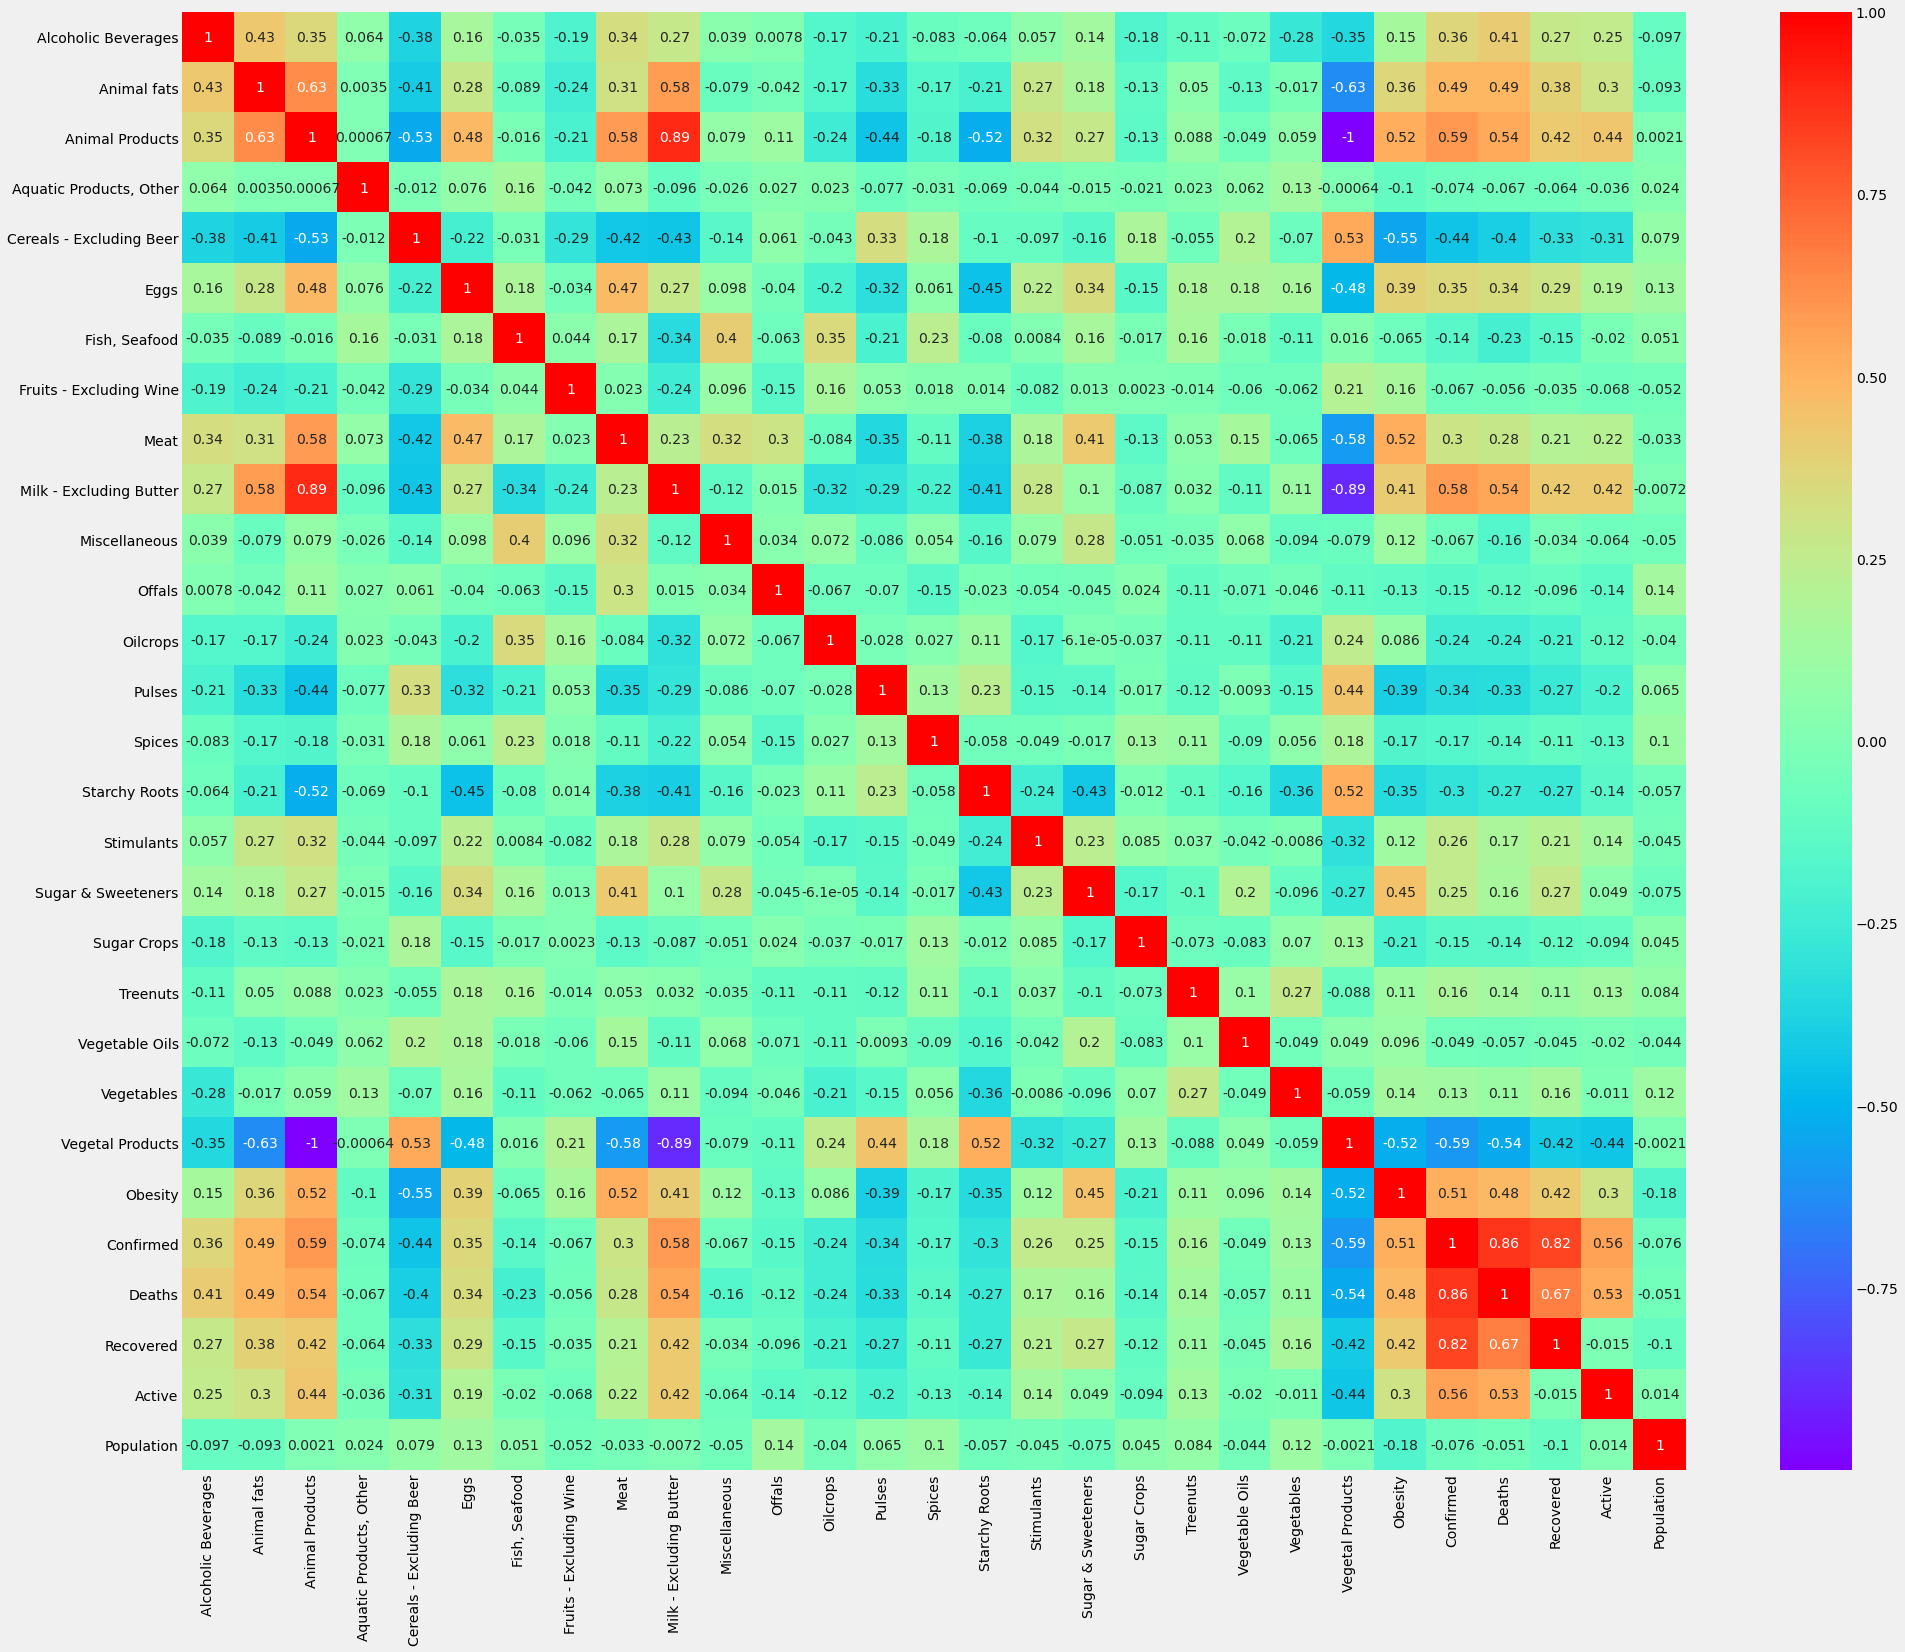

In [ ]:
plt.rcParams['figure.figsize'] = (30, 25)


sns.heatmap(data_food.corr(), cmap = 'rainbow', annot = True)

plt.show()

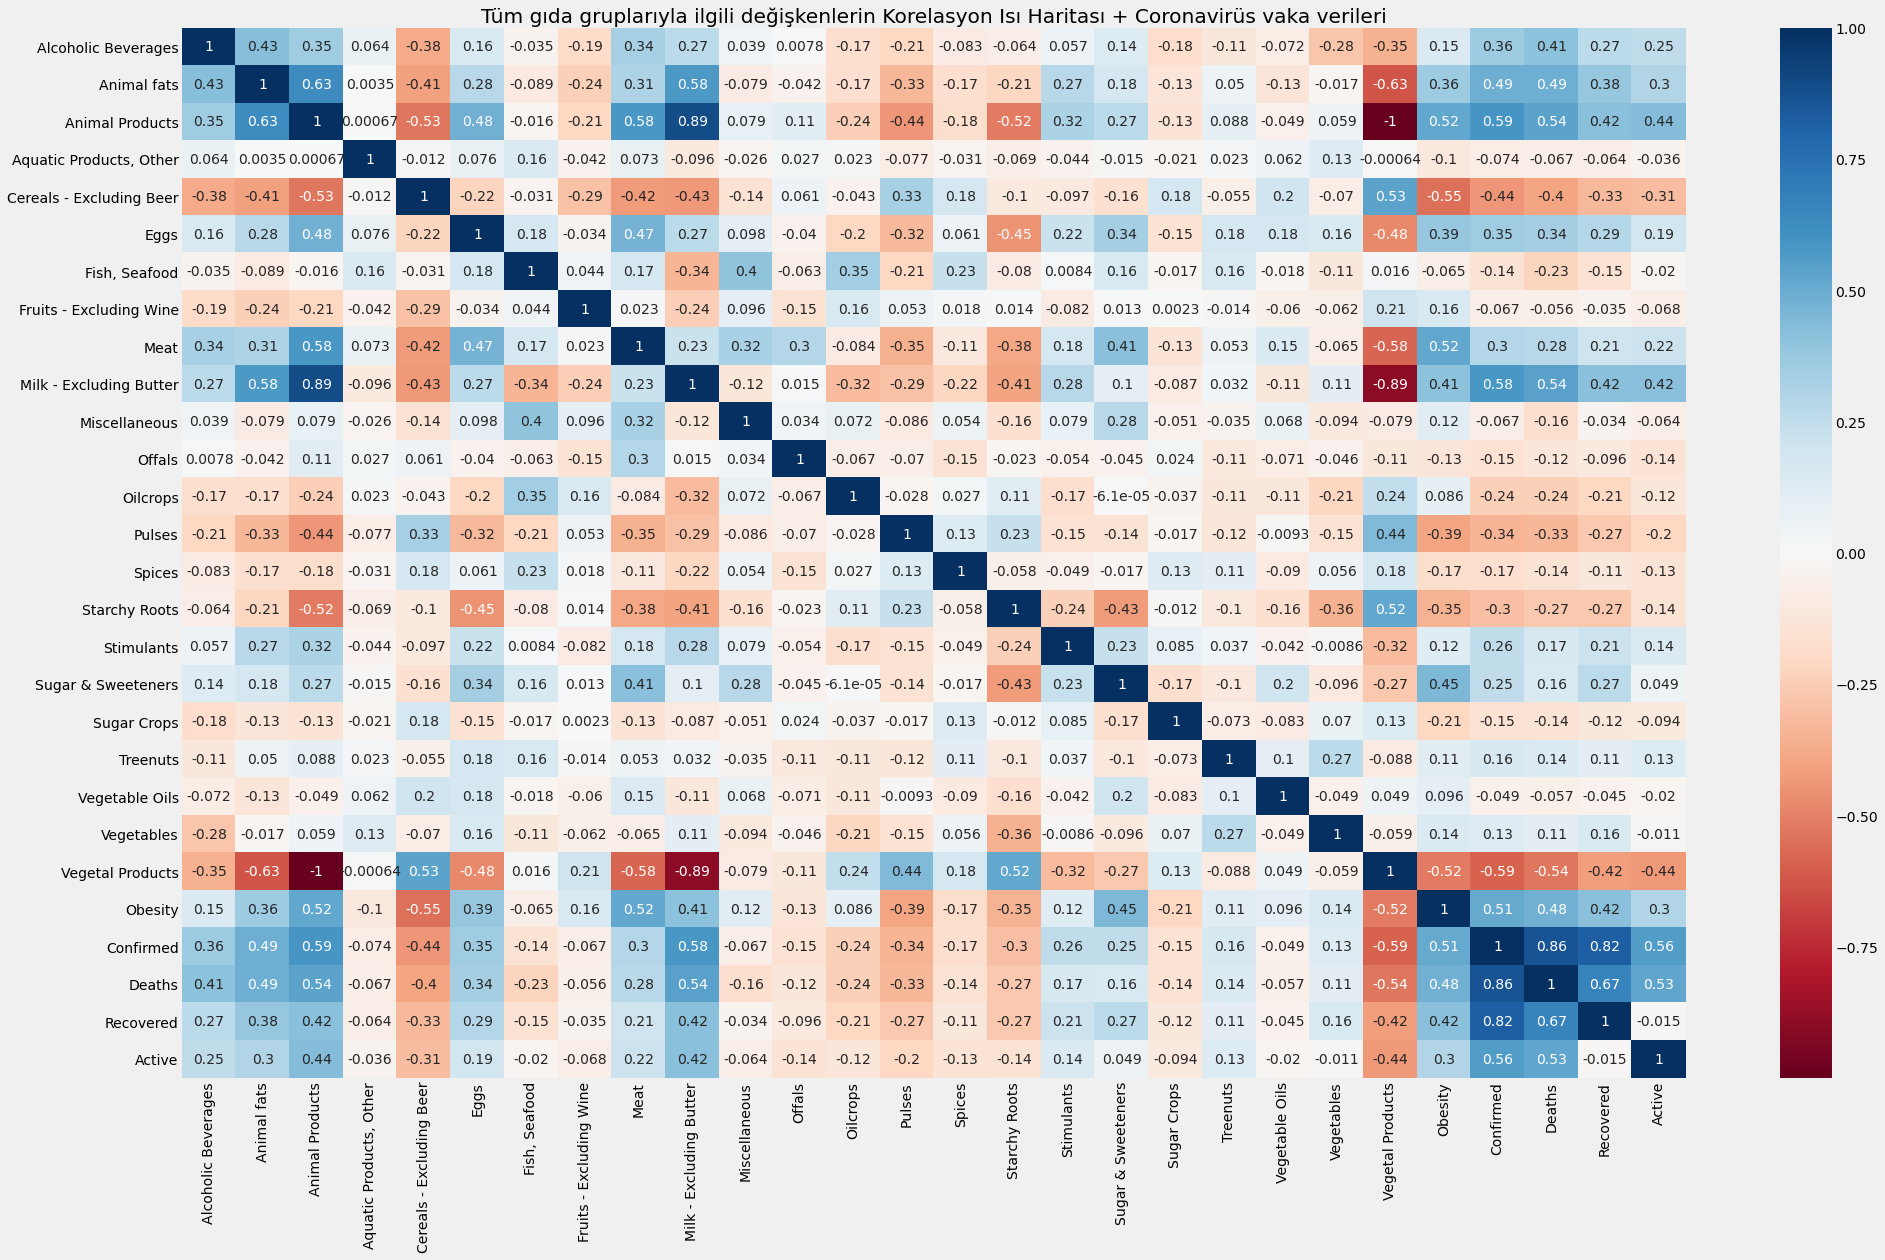

In [ ]:
corr = data_food.loc[:, "Alcoholic Beverages":"Active"].drop("Undernourished", axis=1).corr()
plt.figure(figsize=(30,18))
ax = sns.heatmap(corr, cmap="RdBu", annot=True,)
ax.set_title("Tüm gıda gruplarıyla ilgili değişkenlerin Korelasyon Isı Haritası + Coronavirüs vaka verileri")
ax.figure.show()

# Cinsiyet ve yaş grubu arasındaki ilişkiyi inceleyelim.





In [ ]:
vacg.columns

Index(['E_<2', 'E_2-4', 'E_5-14', 'E_15-24', 'E_25-49', 'E_50-64', 'E_65-79',
       'E_80+', 'K_<2', 'K_2-4', 'K_5-14', 'K_15-24', 'K_25-49', 'K_50-64',
       'K_65-79', 'K_80+'],
      dtype='object')

##80+ erkekleri ve 80+ kadınları karşılaştıralım.

<Figure size 720x576 with 0 Axes>

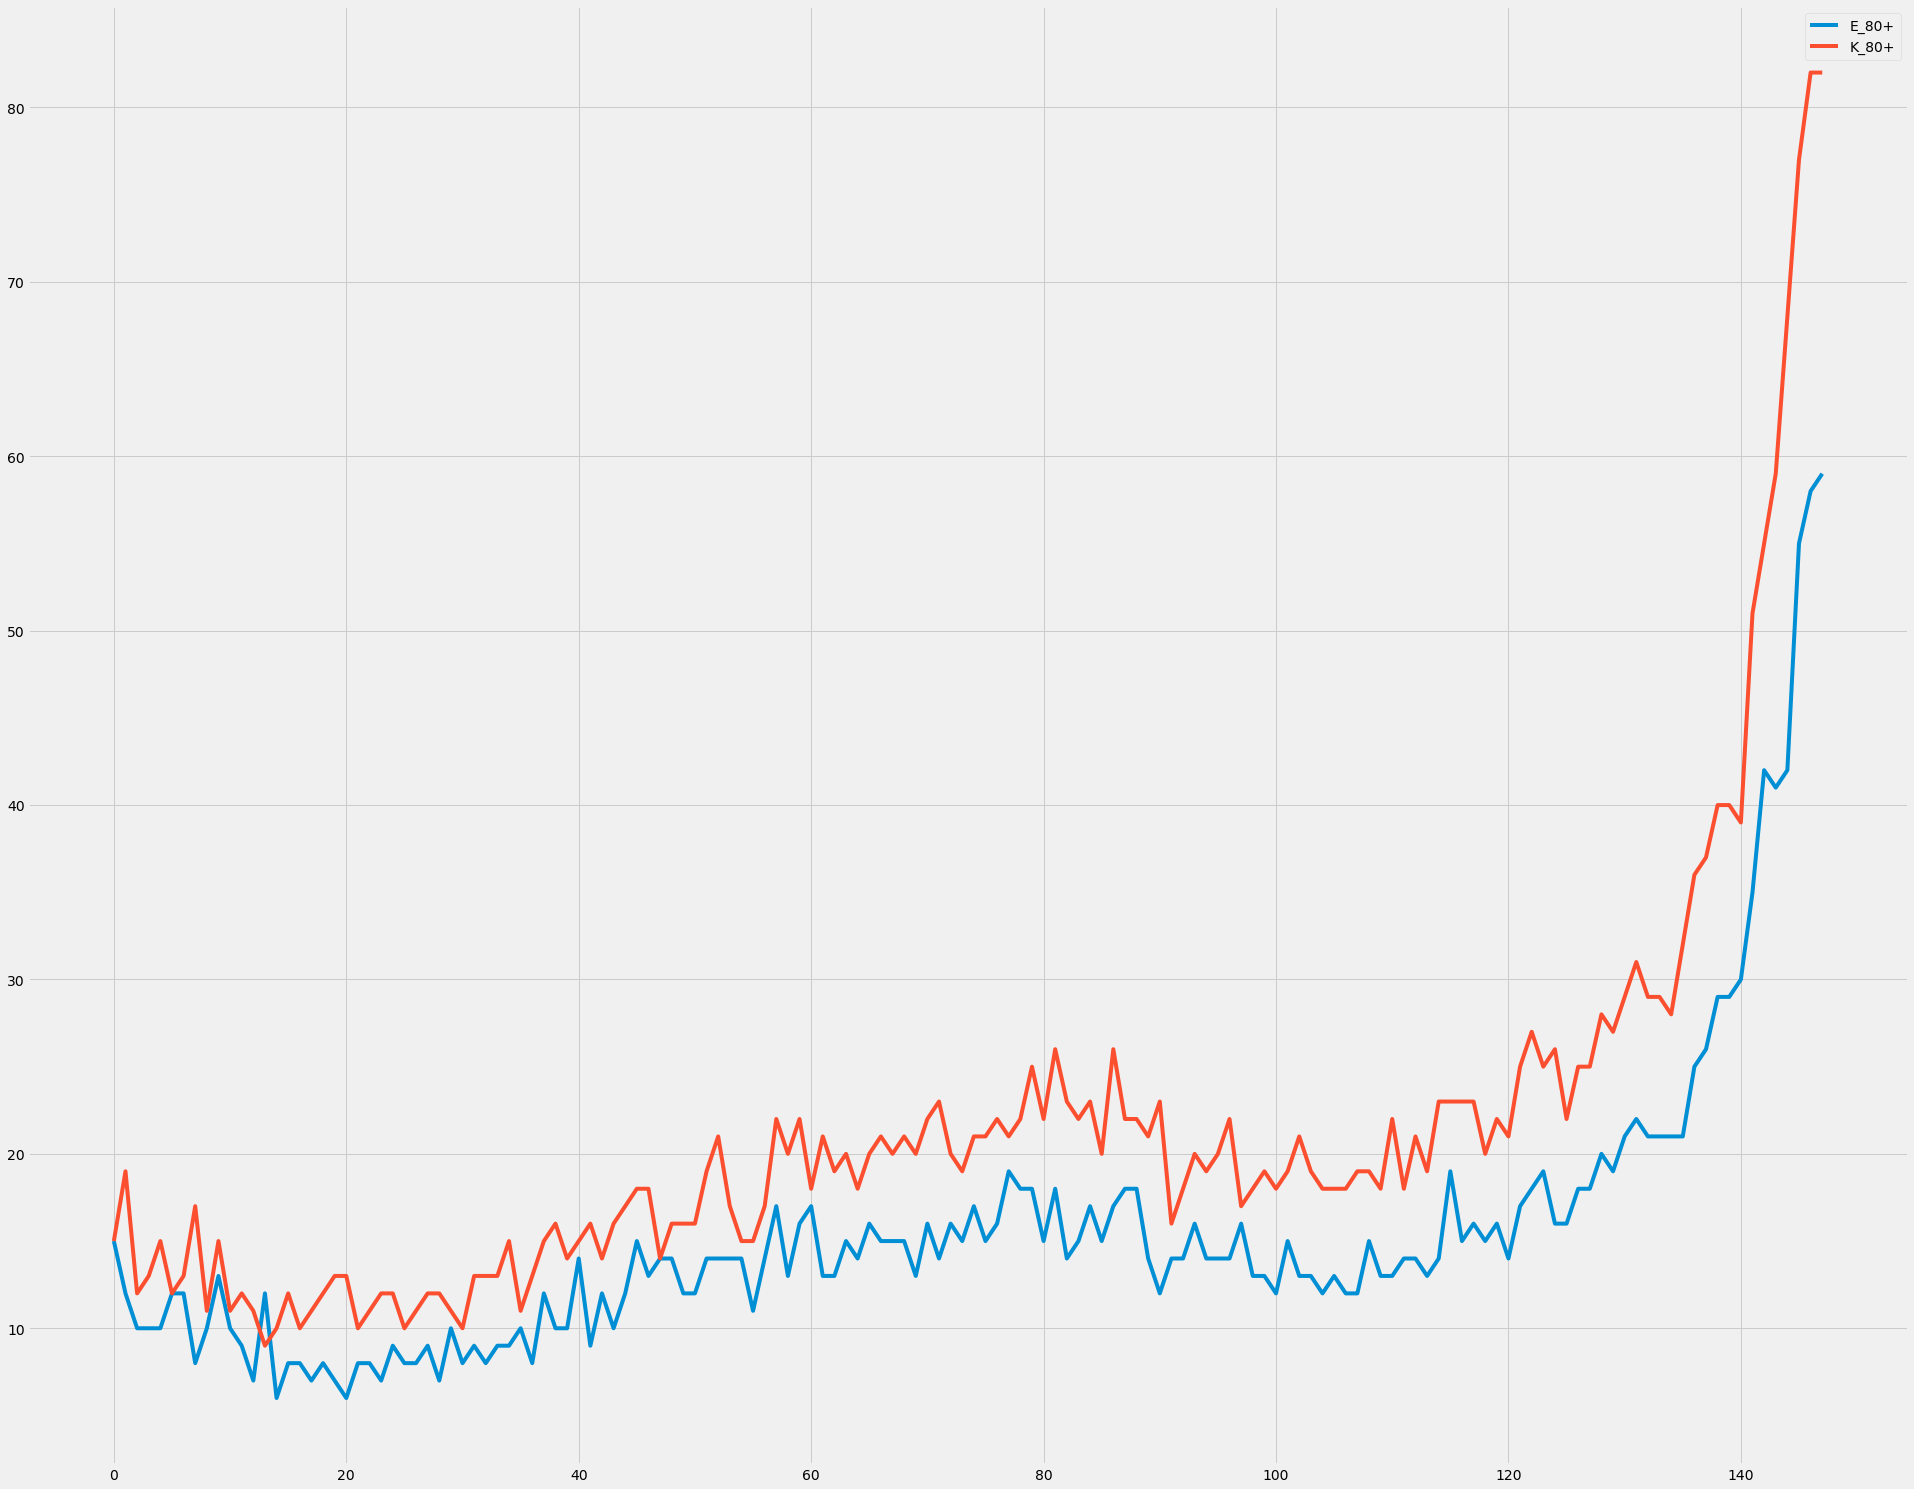

In [ ]:
data_plot = vacg.loc[:,['E_80+','K_80+']]
plt.figure(figsize=(10,8))
data_plot.plot()

##50-64 yaşları arası kadın ve erkek oranlarını karşılaştıralım.

<Figure size 720x576 with 0 Axes>

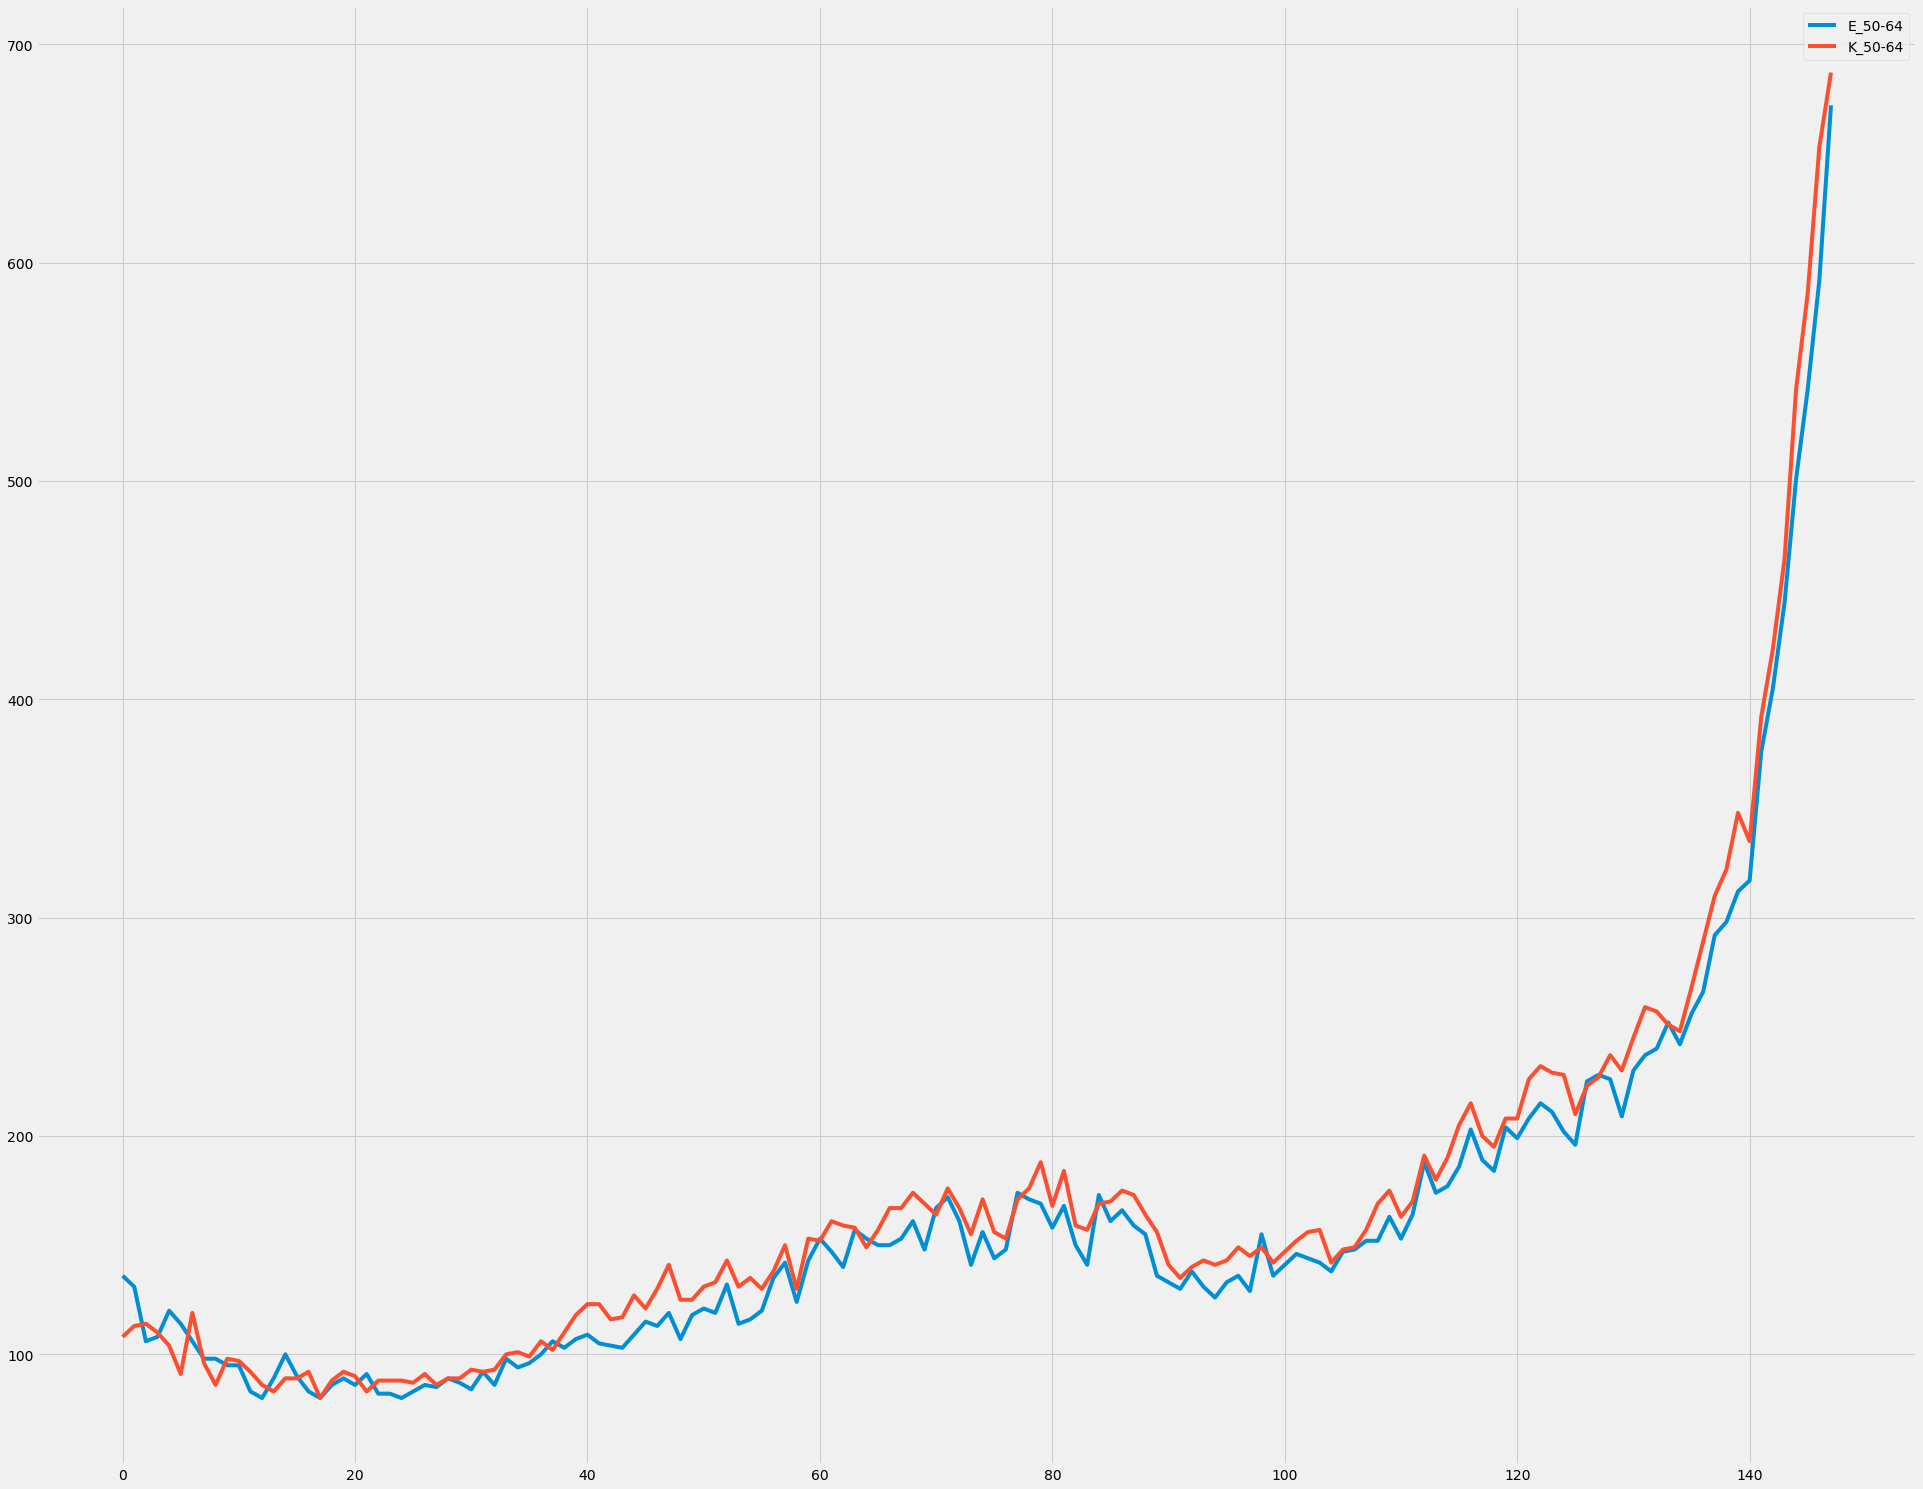

In [ ]:
data_plot = vacg.loc[:,['E_50-64','K_50-64']]
plt.figure(figsize=(10,8))
data_plot.plot()

##25-49 yaş arası kadın ve erkek oranını karşılaştıralım

<Figure size 720x576 with 0 Axes>

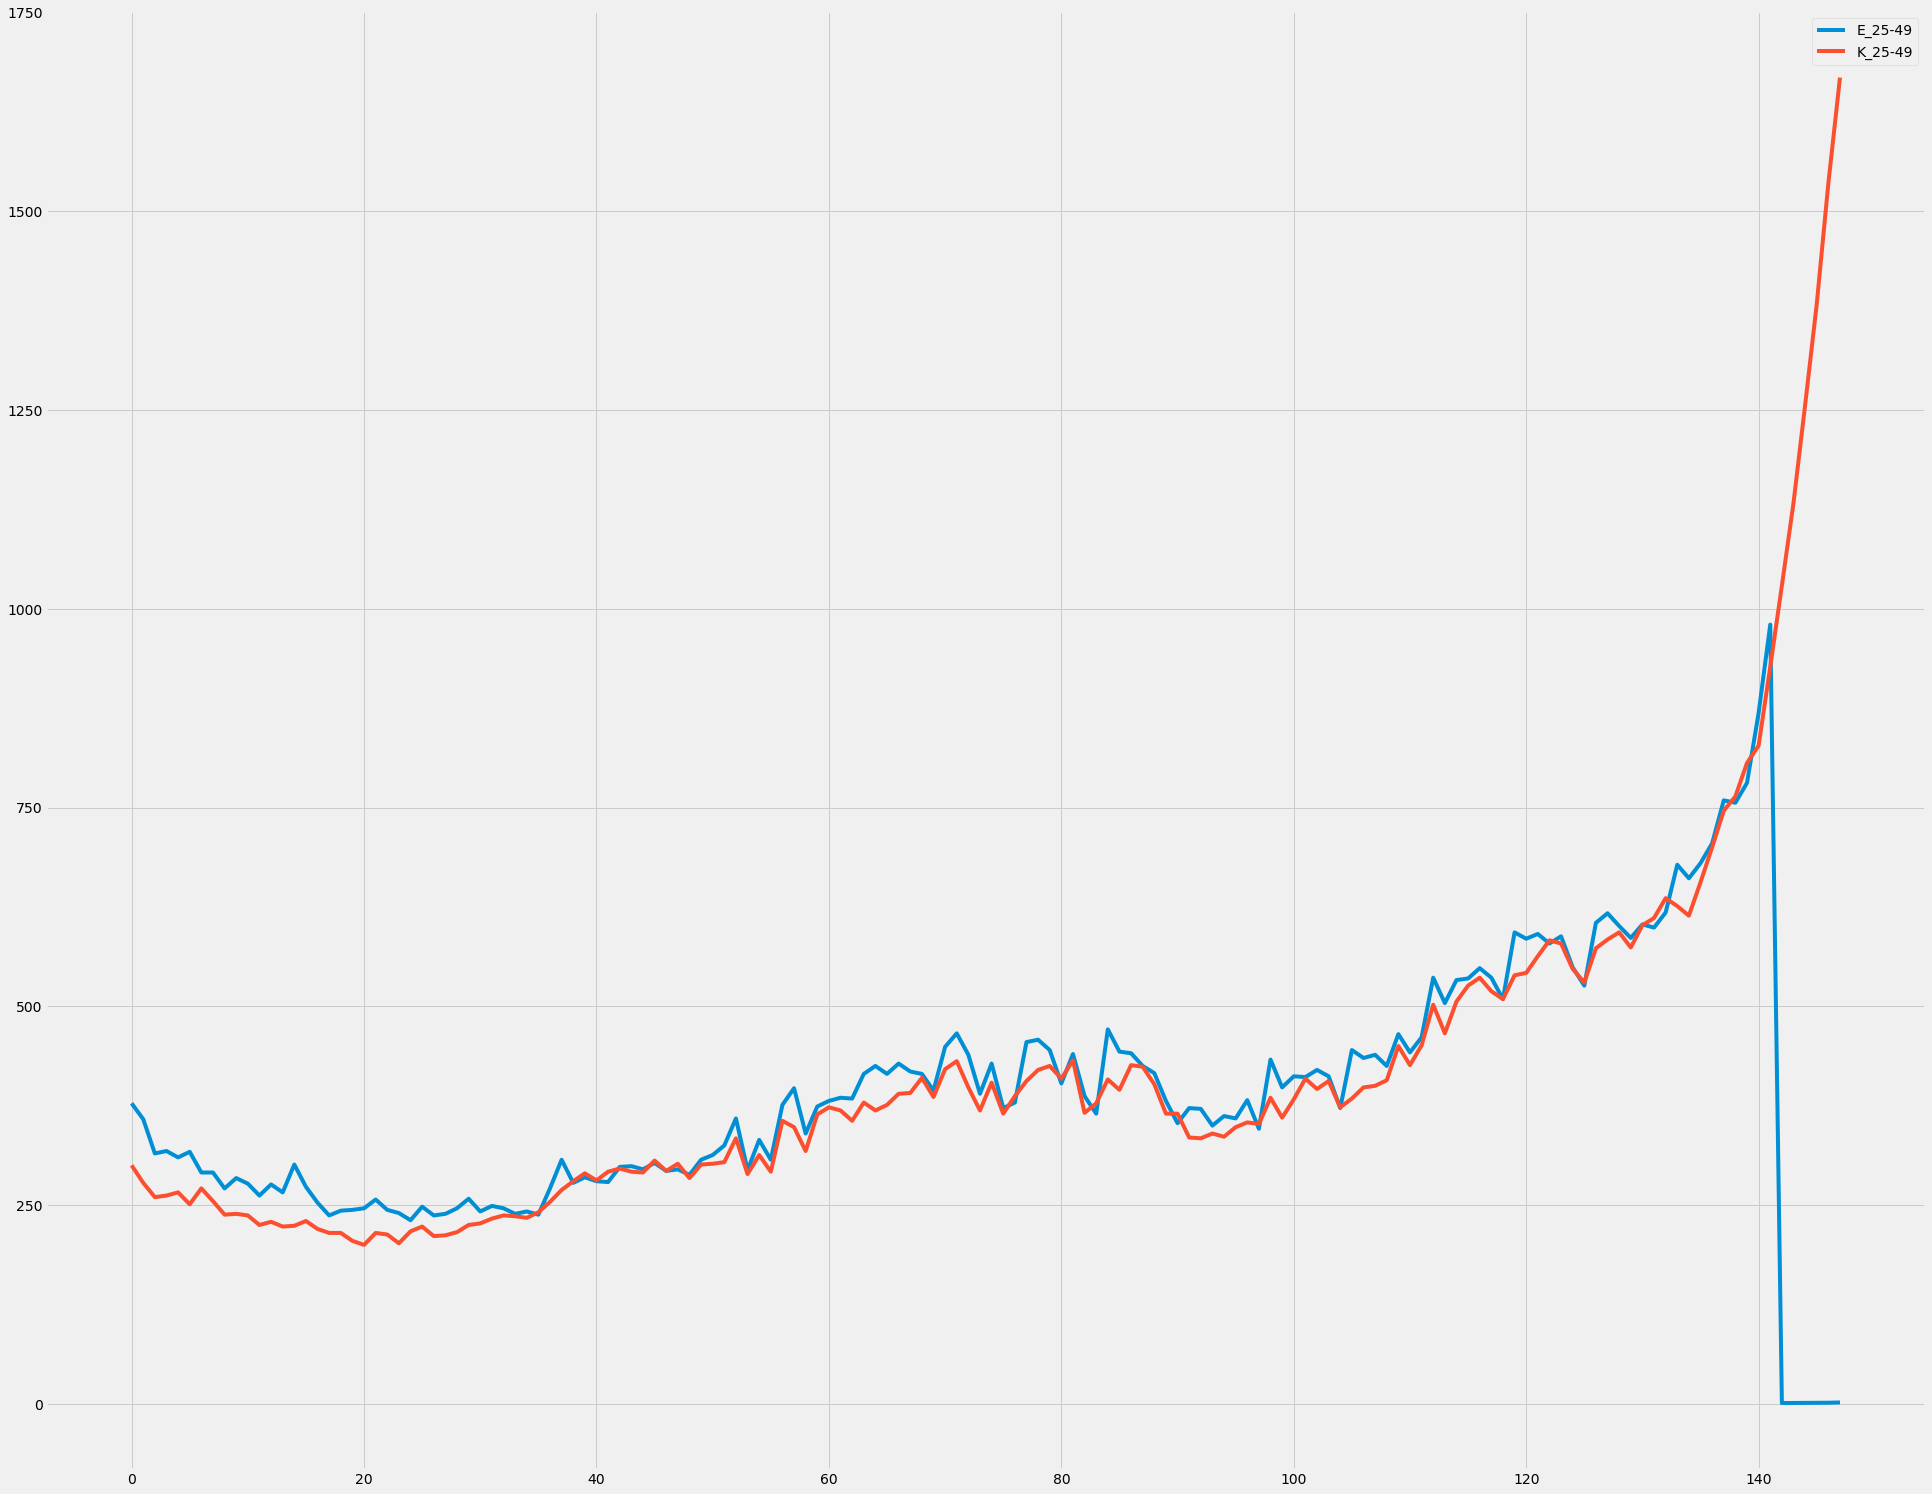

In [ ]:
data_plot = vacg.loc[:,['E_25-49','K_25-49']]
plt.figure(figsize=(10,8))
data_plot.plot()

## Aynı cinsiyette farklı yaş gruplarına bakalım.

<Figure size 720x576 with 0 Axes>

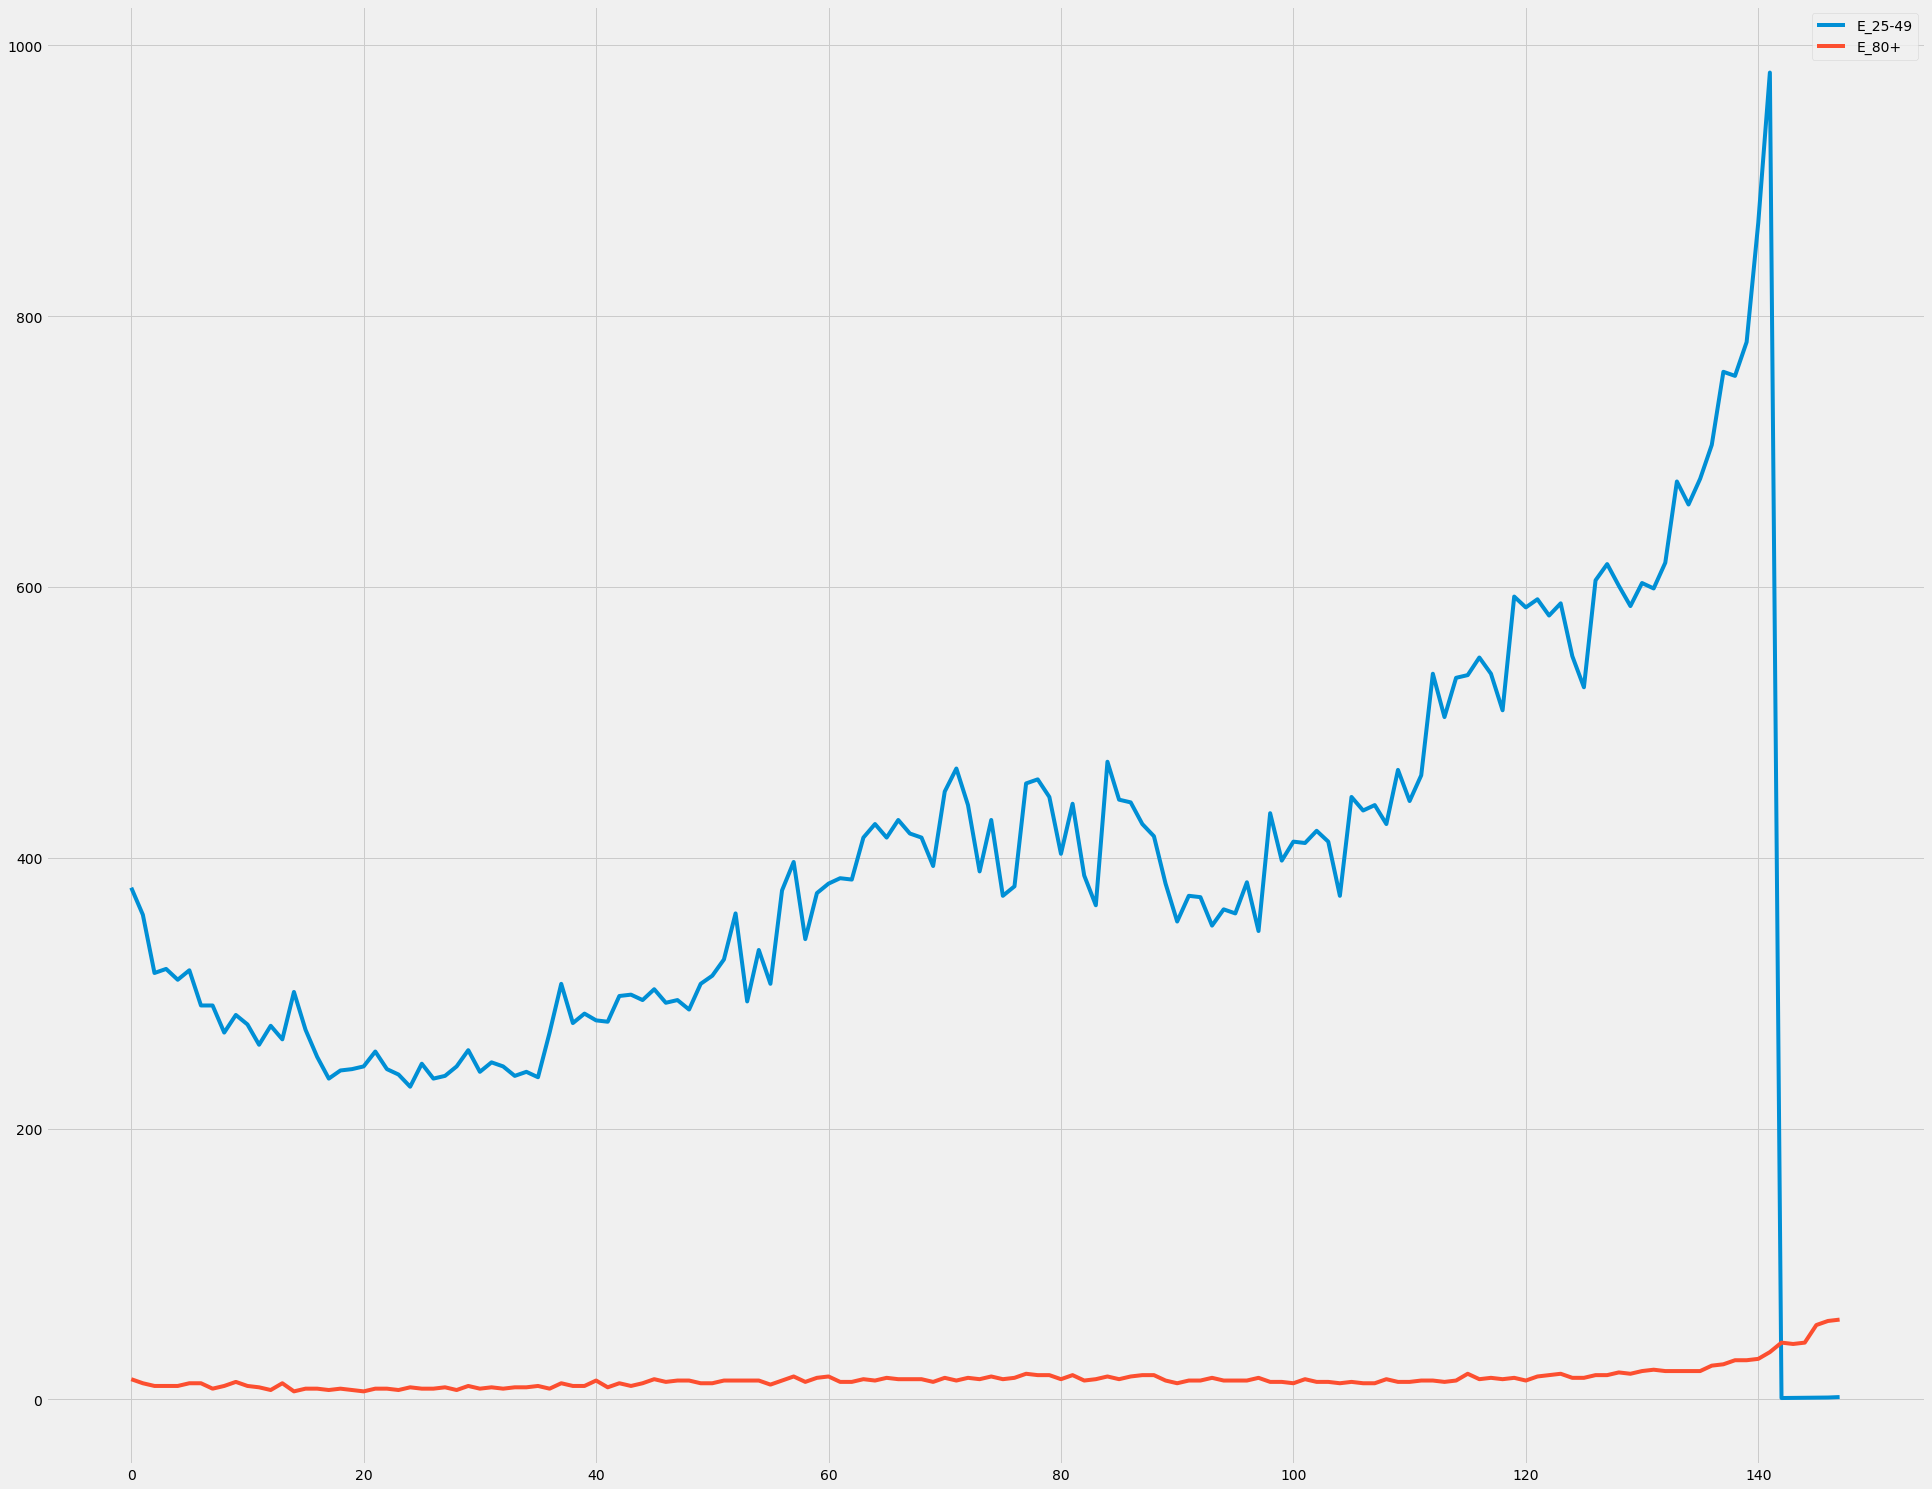

In [ ]:
data_plot = vacg.loc[:,['E_25-49','E_80+']]
plt.figure(figsize=(10,8))
data_plot.plot()

<Figure size 720x576 with 0 Axes>

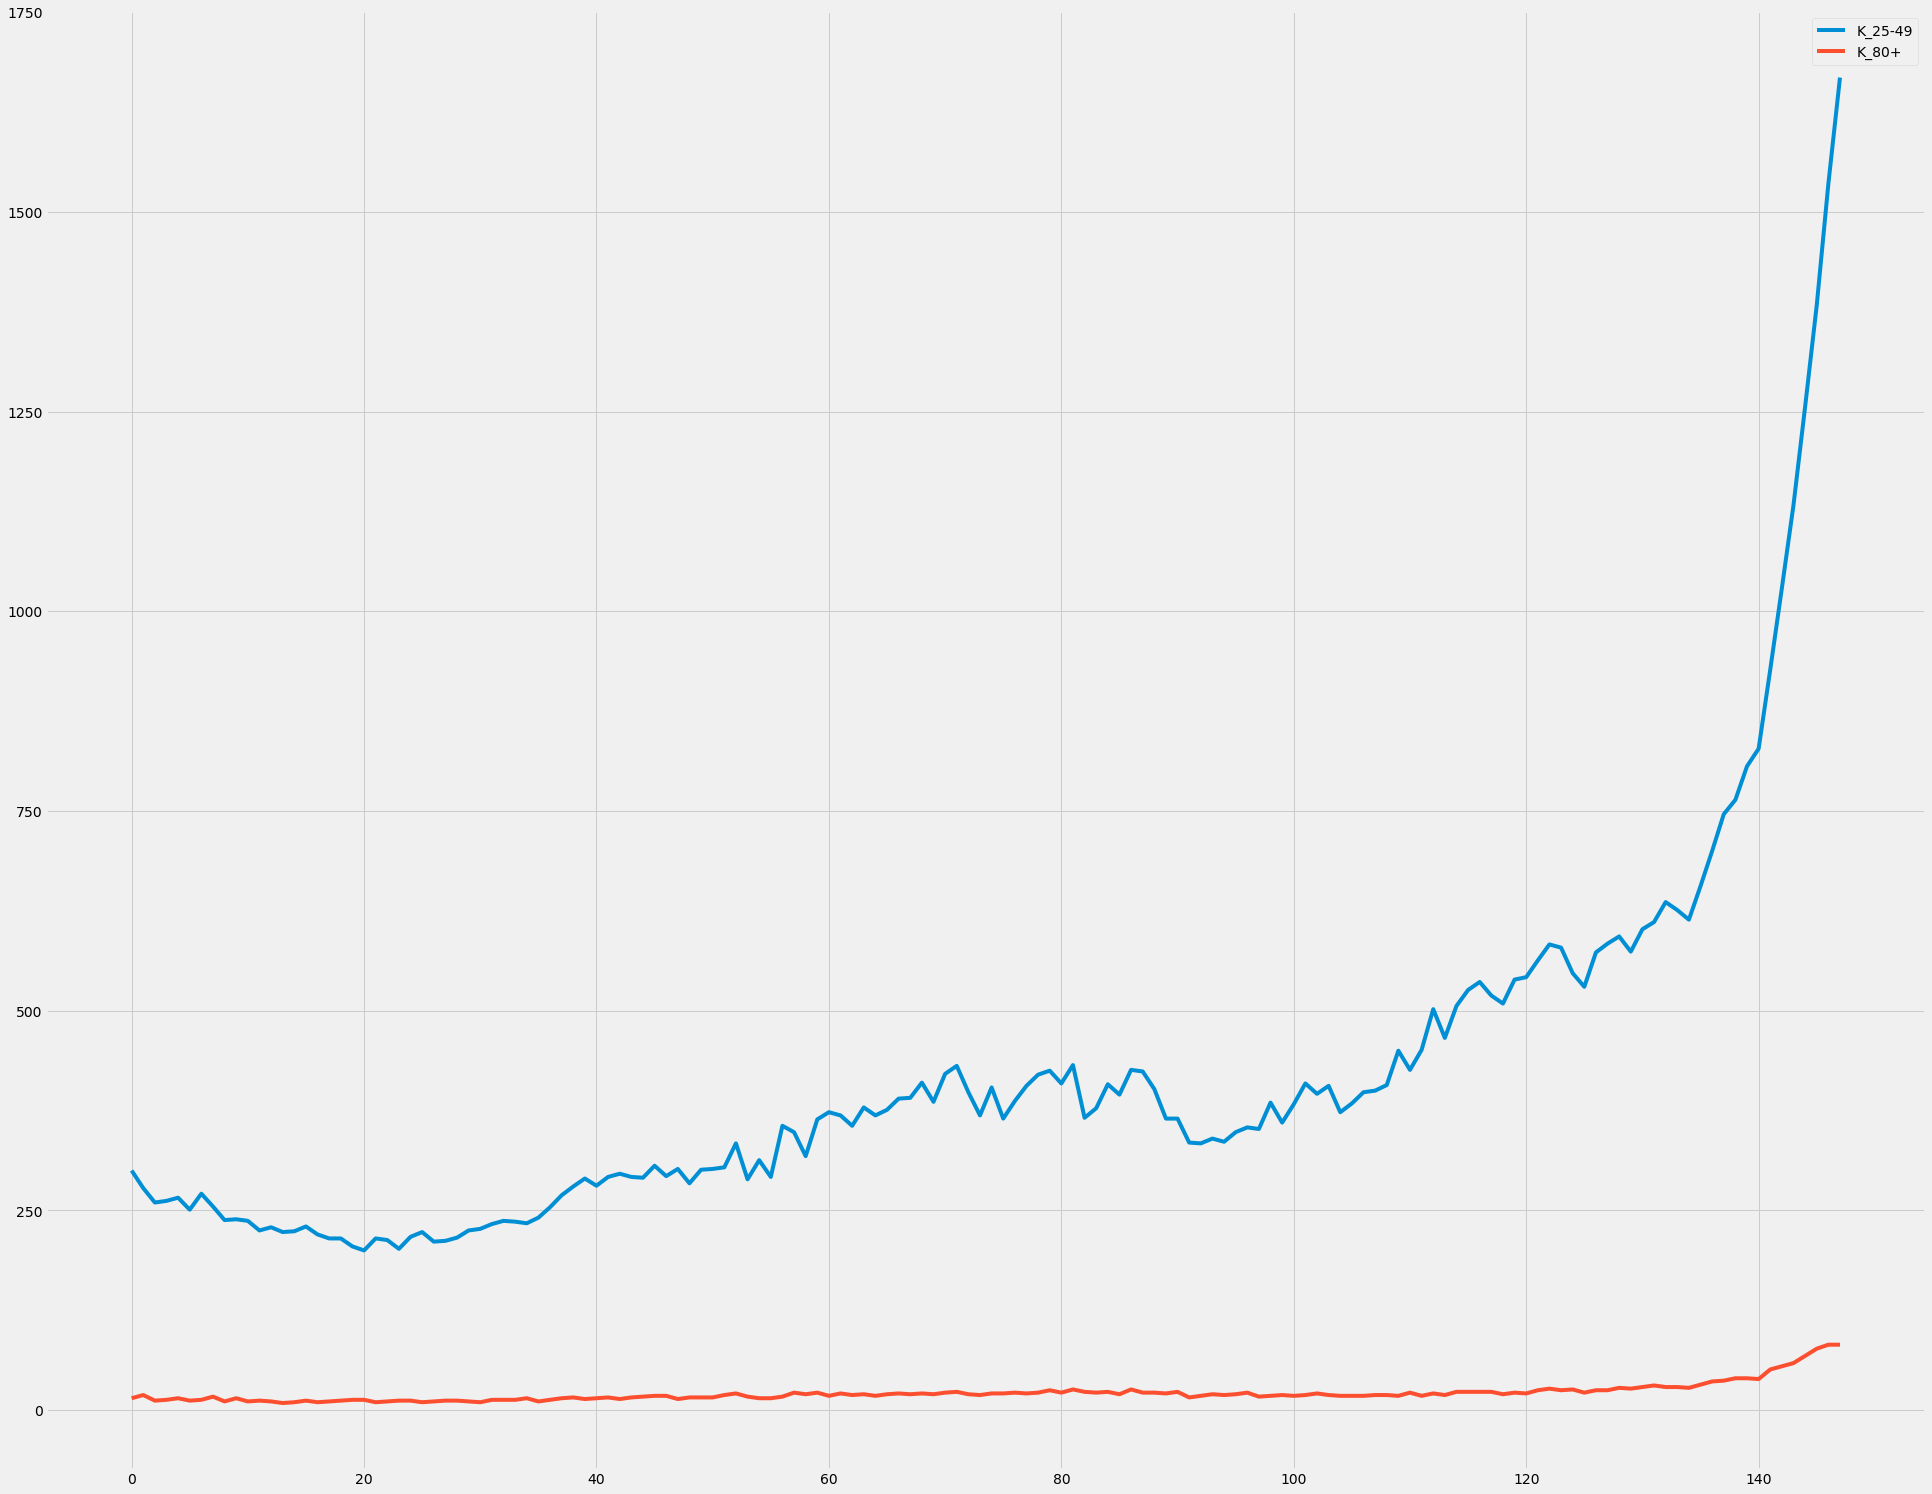

In [ ]:
data_plot = vacg.loc[:,['K_25-49','K_80+']]
plt.figure(figsize=(10,8))
data_plot.plot()

## Vakaları yüzdelik dilim içerisinde gösterelim.

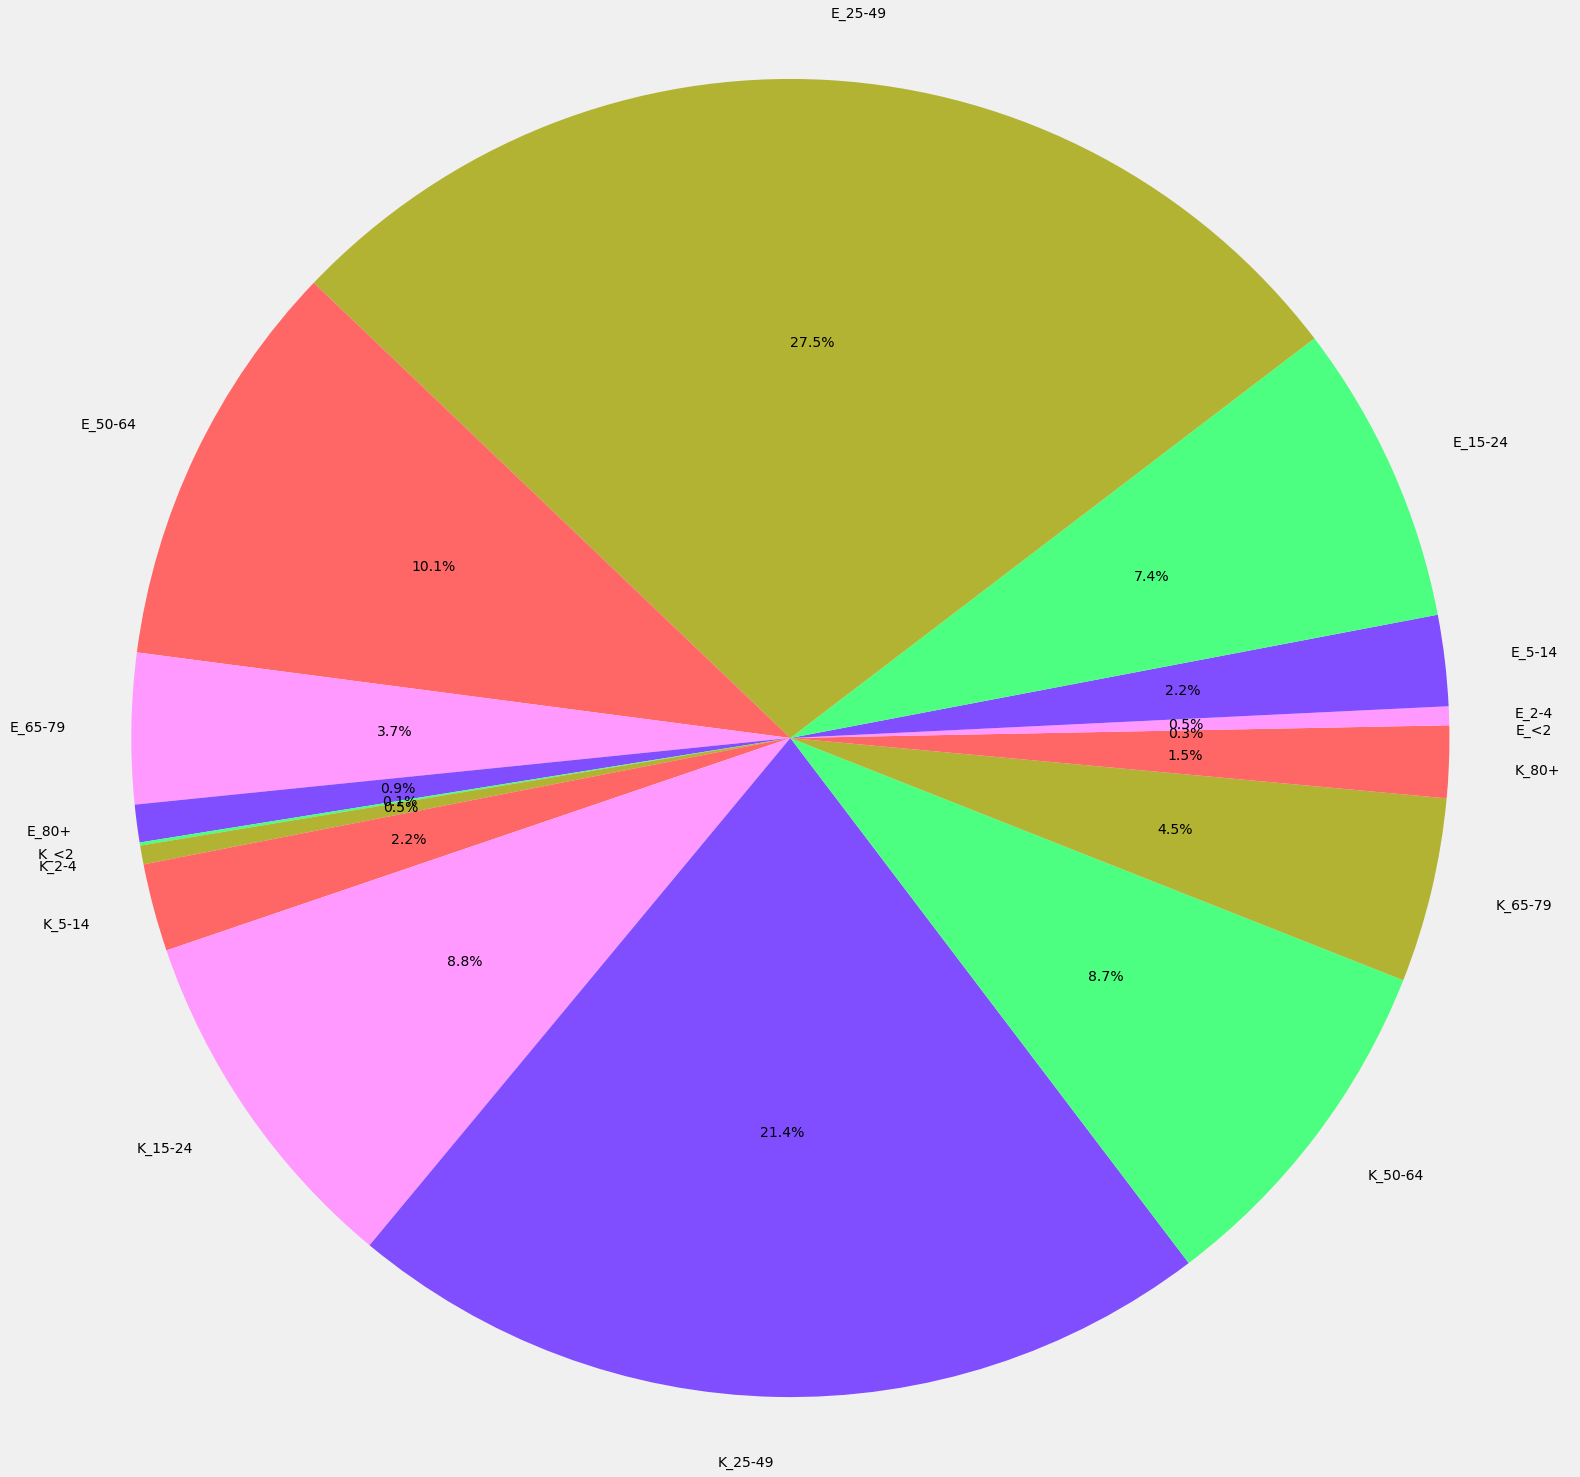

In [ ]:
color=[(1,.4,.4),(1,.6,1),(.5,.3,1),(.3,1,.5),(.7,.7,.2)]
plt.figure(figsize=(25,25))
plt.pie(vacg.iloc[1],labels=vacg.columns,colors=color,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
vacg['E_25-49'].astype(float)

0      378.000
1      358.000
2      315.000
3      318.000
4      310.000
        ...   
143      1.142
144      1.270
145      1.358
146      1.456
147      1.804
Name: E_25-49, Length: 148, dtype: float64

In [ ]:
vacg.iloc[:148]

E_<2  E_2-4  E_5-14  E_15-24  ...  K_25-49  K_50-64  K_65-79  K_80+
0       7     11      38       89  ...      300      108       60     15
1       4      6      29       96  ...      278      113       59     19
2       6     14      30       92  ...      260      114       54     12
3       6      7      35       89  ...      262      110       53     13
4       6      9      28       75  ...      266      104       58     15
..    ...    ...     ...      ...  ...      ...      ...      ...    ...
143     7      7      64      320  ...     1133      464      230     59
144     9     10      72      358  ...     1256      542      262     68
145    10     12      75      360  ...     1383      586      289     77
146    10     11      81      375  ...     1535      653      315     82
147     9     12      80      432  ...     1668      687      321     82

[148 rows x 16 columns]

# Compare 

## Ülkelerdeki aktif vaka oranına bakalım.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



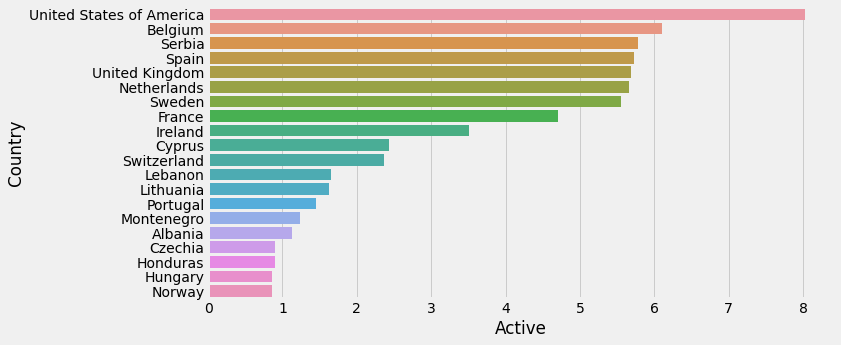

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df = data_fat[['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df.sort_values(by='Active', ascending=False, inplace=True)
sns.barplot(x="Active", y="Country", data=df[:20]);

##Ülkelerdeki confirmed vaka oranlarına bakalım.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



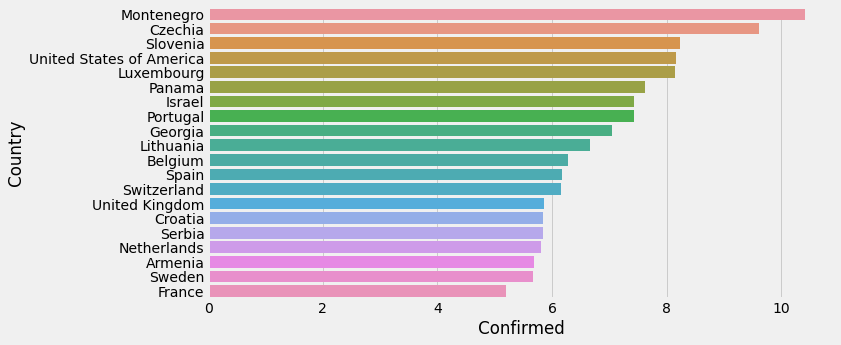

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

df = data_fat[['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df.sort_values(by='Confirmed', ascending=False, inplace=True)
sns.barplot(x="Confirmed", y="Country", data=df[:20]);

## Ülkelerdeki Recovered vaka sayısına bakalım.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



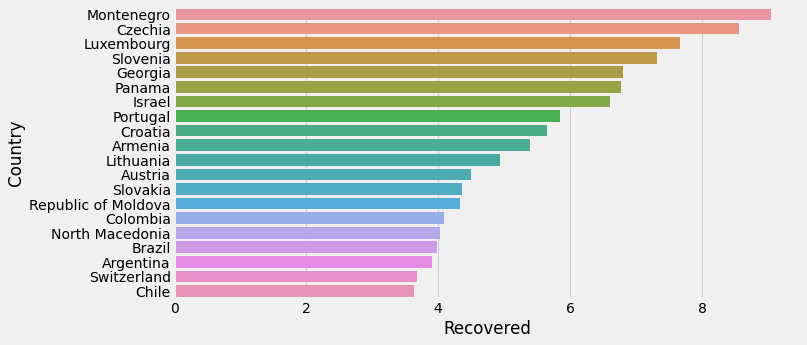

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

df = data_fat[['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df.sort_values(by='Recovered', ascending=False, inplace=True)
sns.barplot(x="Recovered", y="Country", data=df[:20]);

## Ülkelerdeki ölüm oranlarına bakalım.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



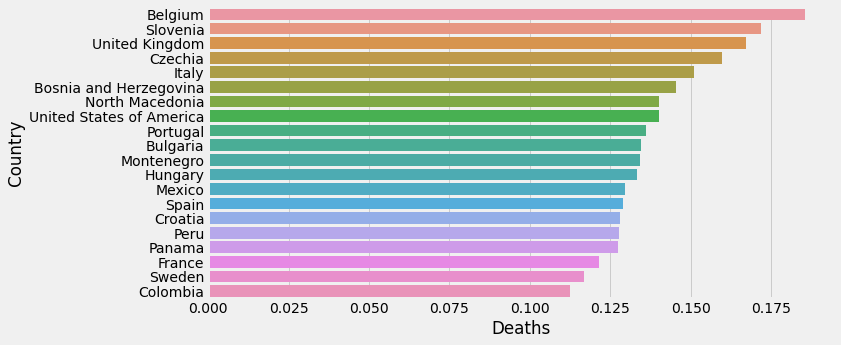

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df = data_fat[['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df.sort_values(by='Deaths', ascending=False, inplace=True)
sns.barplot(x="Deaths", y="Country", data=df[:20]);

## Food ve Covid ilişkisi

In [ ]:
data_food.loc[154]

Country                             Turkey
Alcoholic Beverages                 0.6474
Animal fats                         0.1459
Animal Products                    12.3156
Aquatic Products, Other                  0
Cereals - Excluding Beer             9.708
Eggs                                0.3956
Fish, Seafood                       0.2582
Fruits - Excluding Wine             6.8321
Meat                                2.0694
Milk - Excluding Butter             9.3619
Miscellaneous                       0.0101
Offals                              0.0857
Oilcrops                             0.272
Pulses                               0.682
Spices                              0.1251
Starchy Roots                       2.4947
Stimulants                          0.2002
Sugar & Sweeteners                  1.7004
Sugar Crops                              0
Treenuts                            0.4664
Vegetable Oils                      1.0174
Vegetables                         13.5284
Vegetal Pro

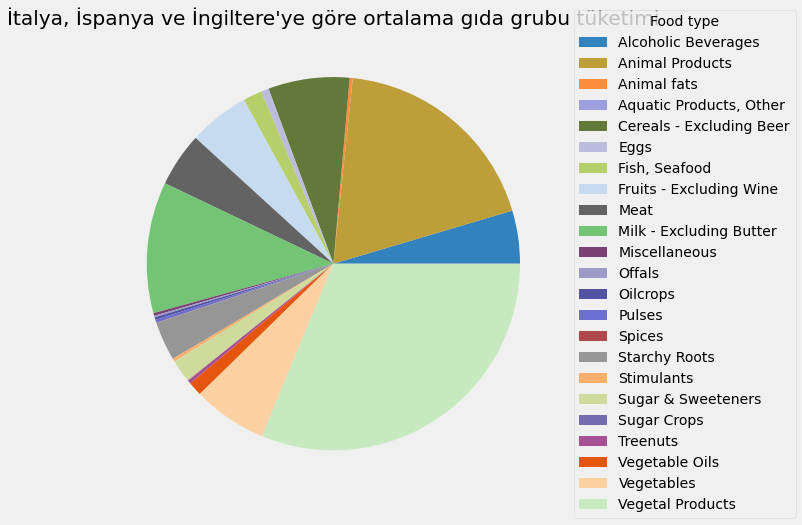

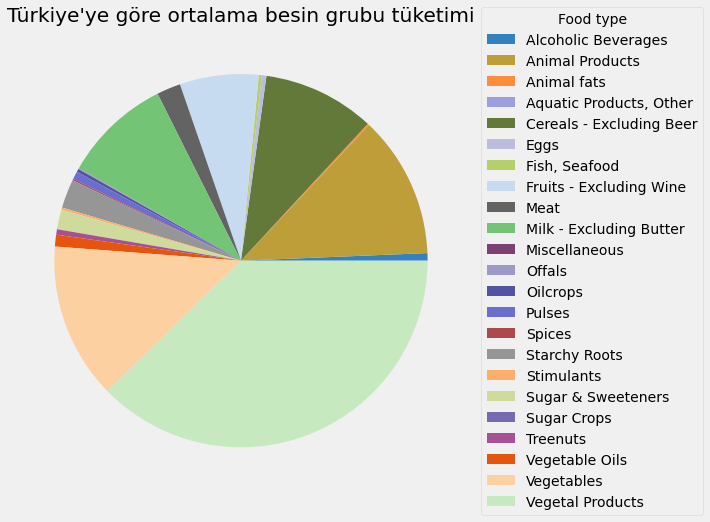

In [ ]:
import random
import matplotlib.cm as cm

random.seed(7)


plt.figure(figsize=(8,8))
diet_europe = data_food.loc[[141, 74, 159], "Alcoholic Beverages":"Vegetal Products"].sort_index(axis=1)
colors = random.sample(list(cm.tab20b.colors) + list(cm.tab20c.colors),k = diet_europe.shape[1])
wedges, texts = plt.pie(diet_europe.mean().values.reshape(-1), colors=colors)
plt.legend(wedges, diet_europe.columns,
          title="Food type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("İtalya, İspanya ve İngiltere'ye göre ortalama gıda grubu tüketimi")
plt.show()

plt.figure(figsize=(8,8))
diet_east_asia = data_food.loc[[154], "Alcoholic Beverages":"Vegetal Products"].sort_index(axis=1)
wedges, texts = plt.pie(diet_east_asia.mean().values.reshape(-1), colors=colors)
plt.legend(wedges, diet_east_asia.columns,
          title="Food type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Türkiye'ye göre ortalama besin grubu tüketimi")
plt.show()

**Hayvansal Ürünlerin Tüketimi**
Burada hayvansal ürünlerin tüketimi, genel diyetin ne kadarını (%) temsil ettiğine bağlı olarak üç gruba ayrılır:

%0 - %10: Düşük
%10 - %20: Orta
%20 - %30: Yüksek
Hayvansal ürün tüketimine göre gruplandırılmış obezite oranını gösteren aşağıdaki kutu grafiğinde, diyette bulunan hayvansal ürün miktarı ne kadar yüksek olursa, bu ülkelerin ortalama obezite oranının o kadar yüksek olduğunu gözlemleyebiliriz, bu bir korelasyon olduğunu gösterebilir.

Bunun altında, teyit edilen vakaların toplam nüfusa göre yüzdesini temsil eden başka bir kutu grafiği var ve yine, hayvansal ürün tüketimi ne kadar yüksek olursa, söz konusu ülkelerde vaka sayısının o kadar yüksek olduğu yönünde bir eğilim var.

Son şekilde tüm ülkeler için tüketilen hayvansal ürünlerin yüzdesi (x), obezite (y), ölüm oranı (renk haritası) ve nüfusa göre doğrulanmış vaka sayısı (dairelerin boyutu) temsil edilmektedir. AP/Obezite oranı daha yüksek olan ülkelerde, daha düşük AP/Obezite oranına sahip olanlardan daha yüksek ölüm oranı ve doğrulanmış vaka yüzdesi olduğunu gözlemleyebiliriz. Bu, diyetin yalnızca popülasyonların genel sağlığı hakkında değil, aynı zamanda durumun nasıl ele alındığı konusunda sahip olabileceği sosyolojik etki hakkında da bir fikir sağlayabileceğini gösterebilir.

In [ ]:
data_food["recovered"] = (data_food["Recovered"]/data_food["Confirmed"])*100
data_food["deaths"] = (data_food["Deaths"]/data_food["Confirmed"])*100
data_food["active"] = (data_food["Active"]/data_food["Confirmed"])*100

data_food["Hayvansal Ürünlerin Tüketimi"] = pd.cut(data_food["Animal Products"], [0, 10, 20, 30], labels=["low", "medium", "high"])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



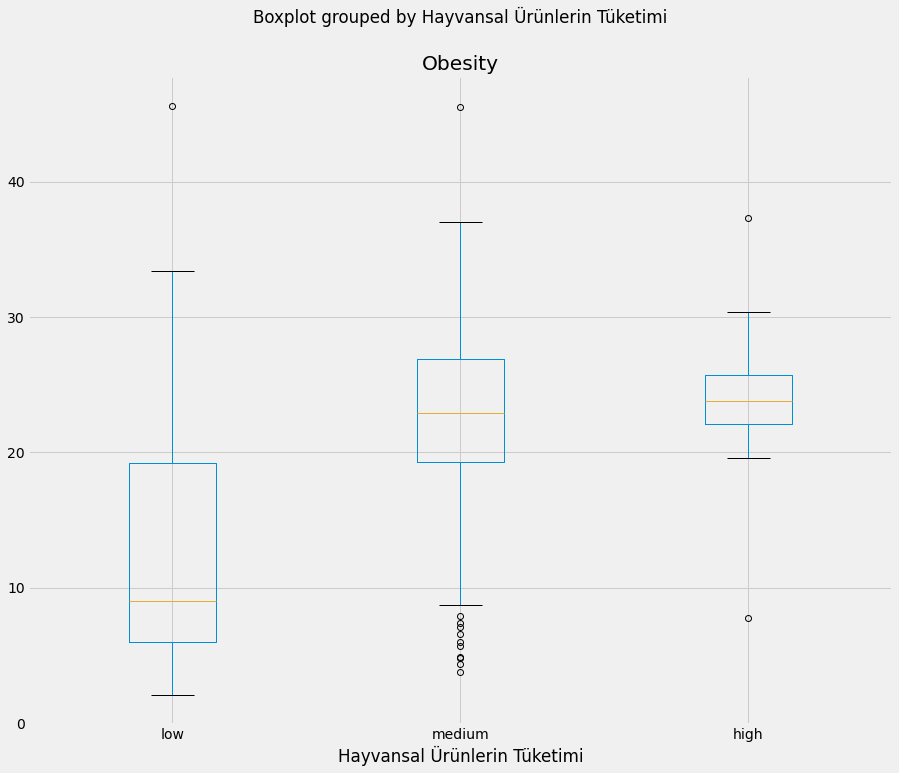

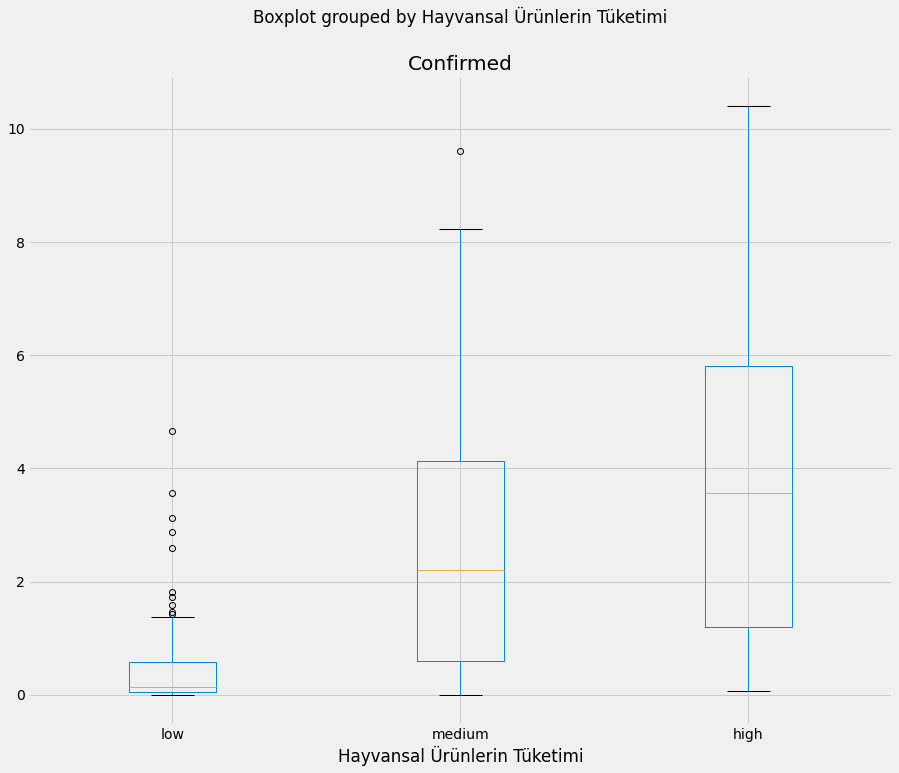

In [ ]:
data_food.boxplot(column=["Obesity"], by="Hayvansal Ürünlerin Tüketimi", figsize=(15,12))
data_food.boxplot(column=["Confirmed"], by="Hayvansal Ürünlerin Tüketimi", figsize=(15,12))
plt.show()

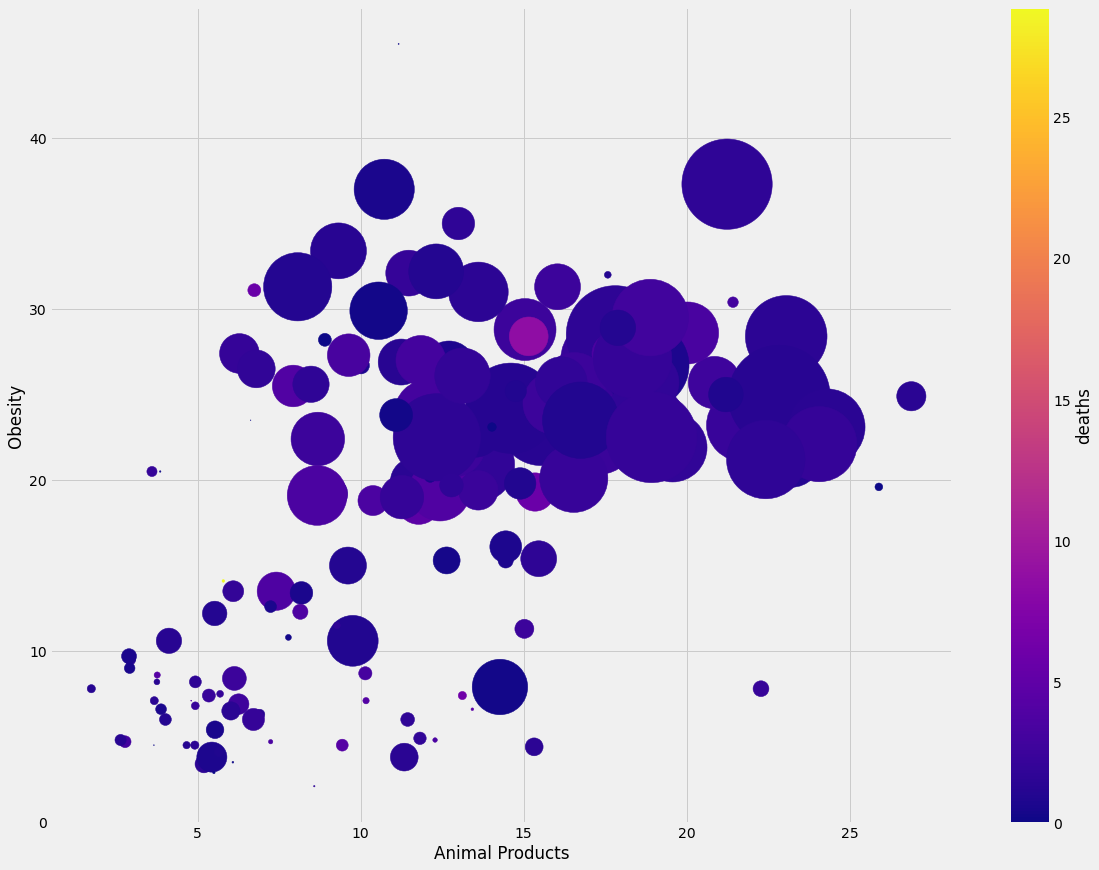

In [ ]:
fig, ax = plt.subplots()
data_food.plot(kind='scatter', x='Animal Products', y='Obesity', s=data_food["Confirmed"]*1000, c='deaths', cmap='plasma', figsize=(18,14), ax=ax) 
plt.show()

# Vaccinations

In [ ]:
data_vaccinations['vaccines'].unique()

array(['BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech', 'Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac, Sputnik V', 'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'BBIBP-CorV, Sputnik V', 'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinovac', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac',
       'BBIBP-CorV, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Covaxin, Oxford/AstraZeneca', 'BBIBP-CorV',
       'CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'CanSino, Sinopharm/Bei

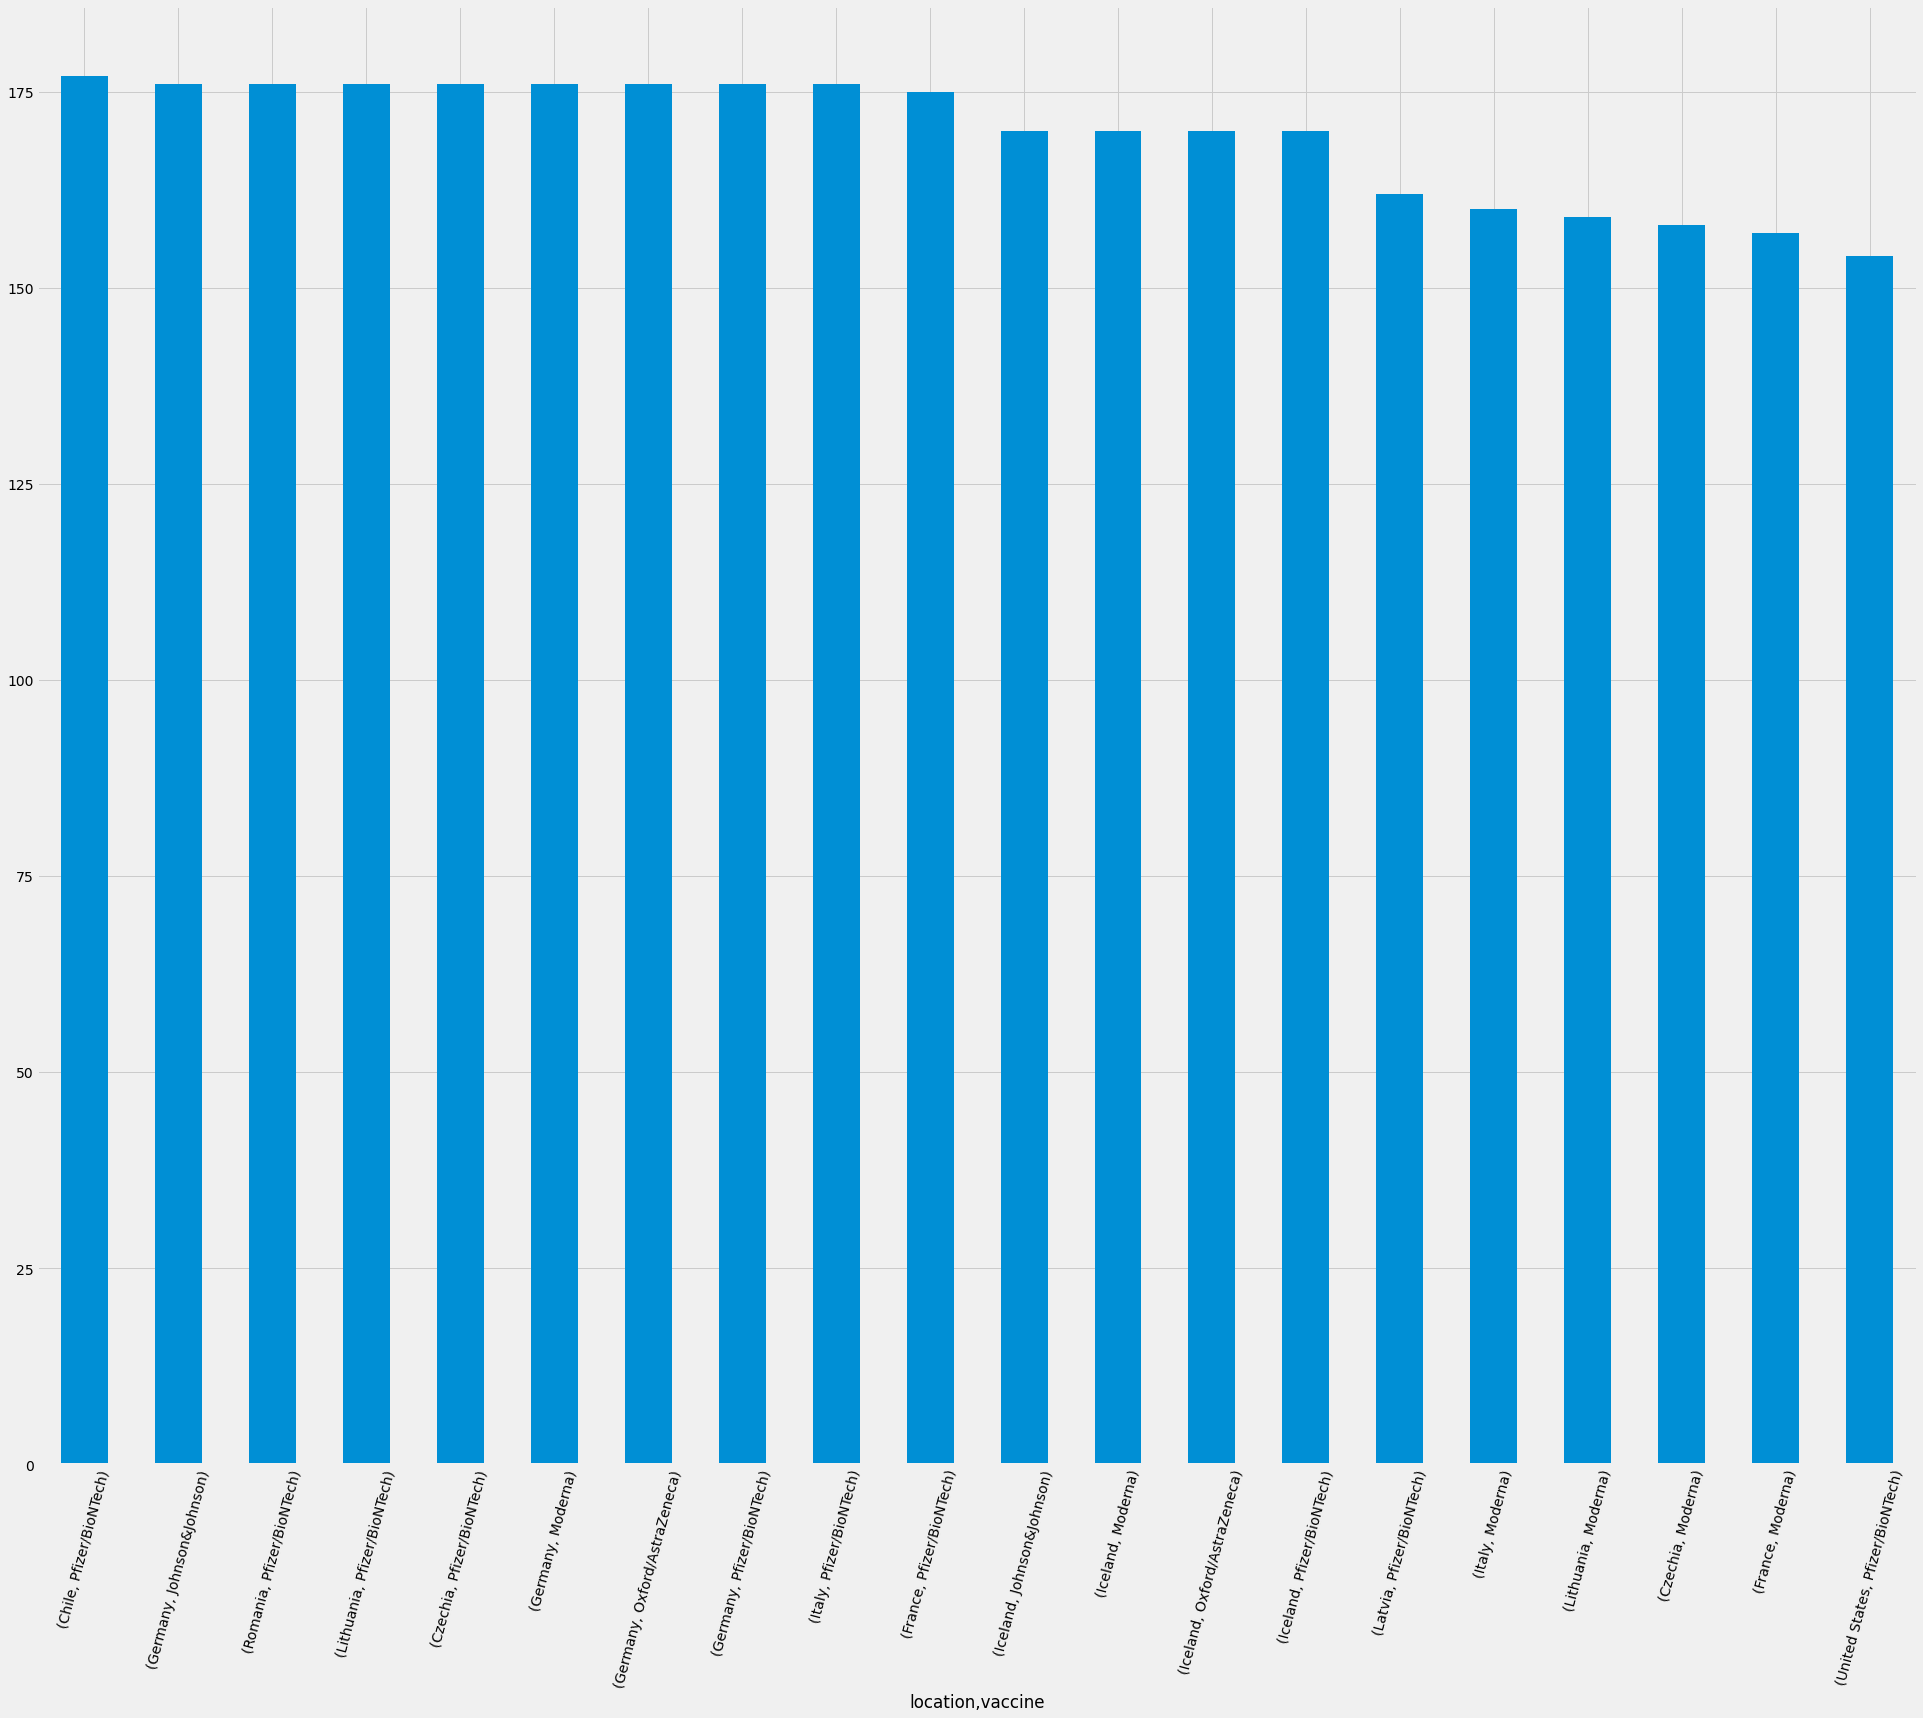

In [ ]:
data_vaccinations_m.groupby("location")["vaccine"].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xticks(rotation=75);

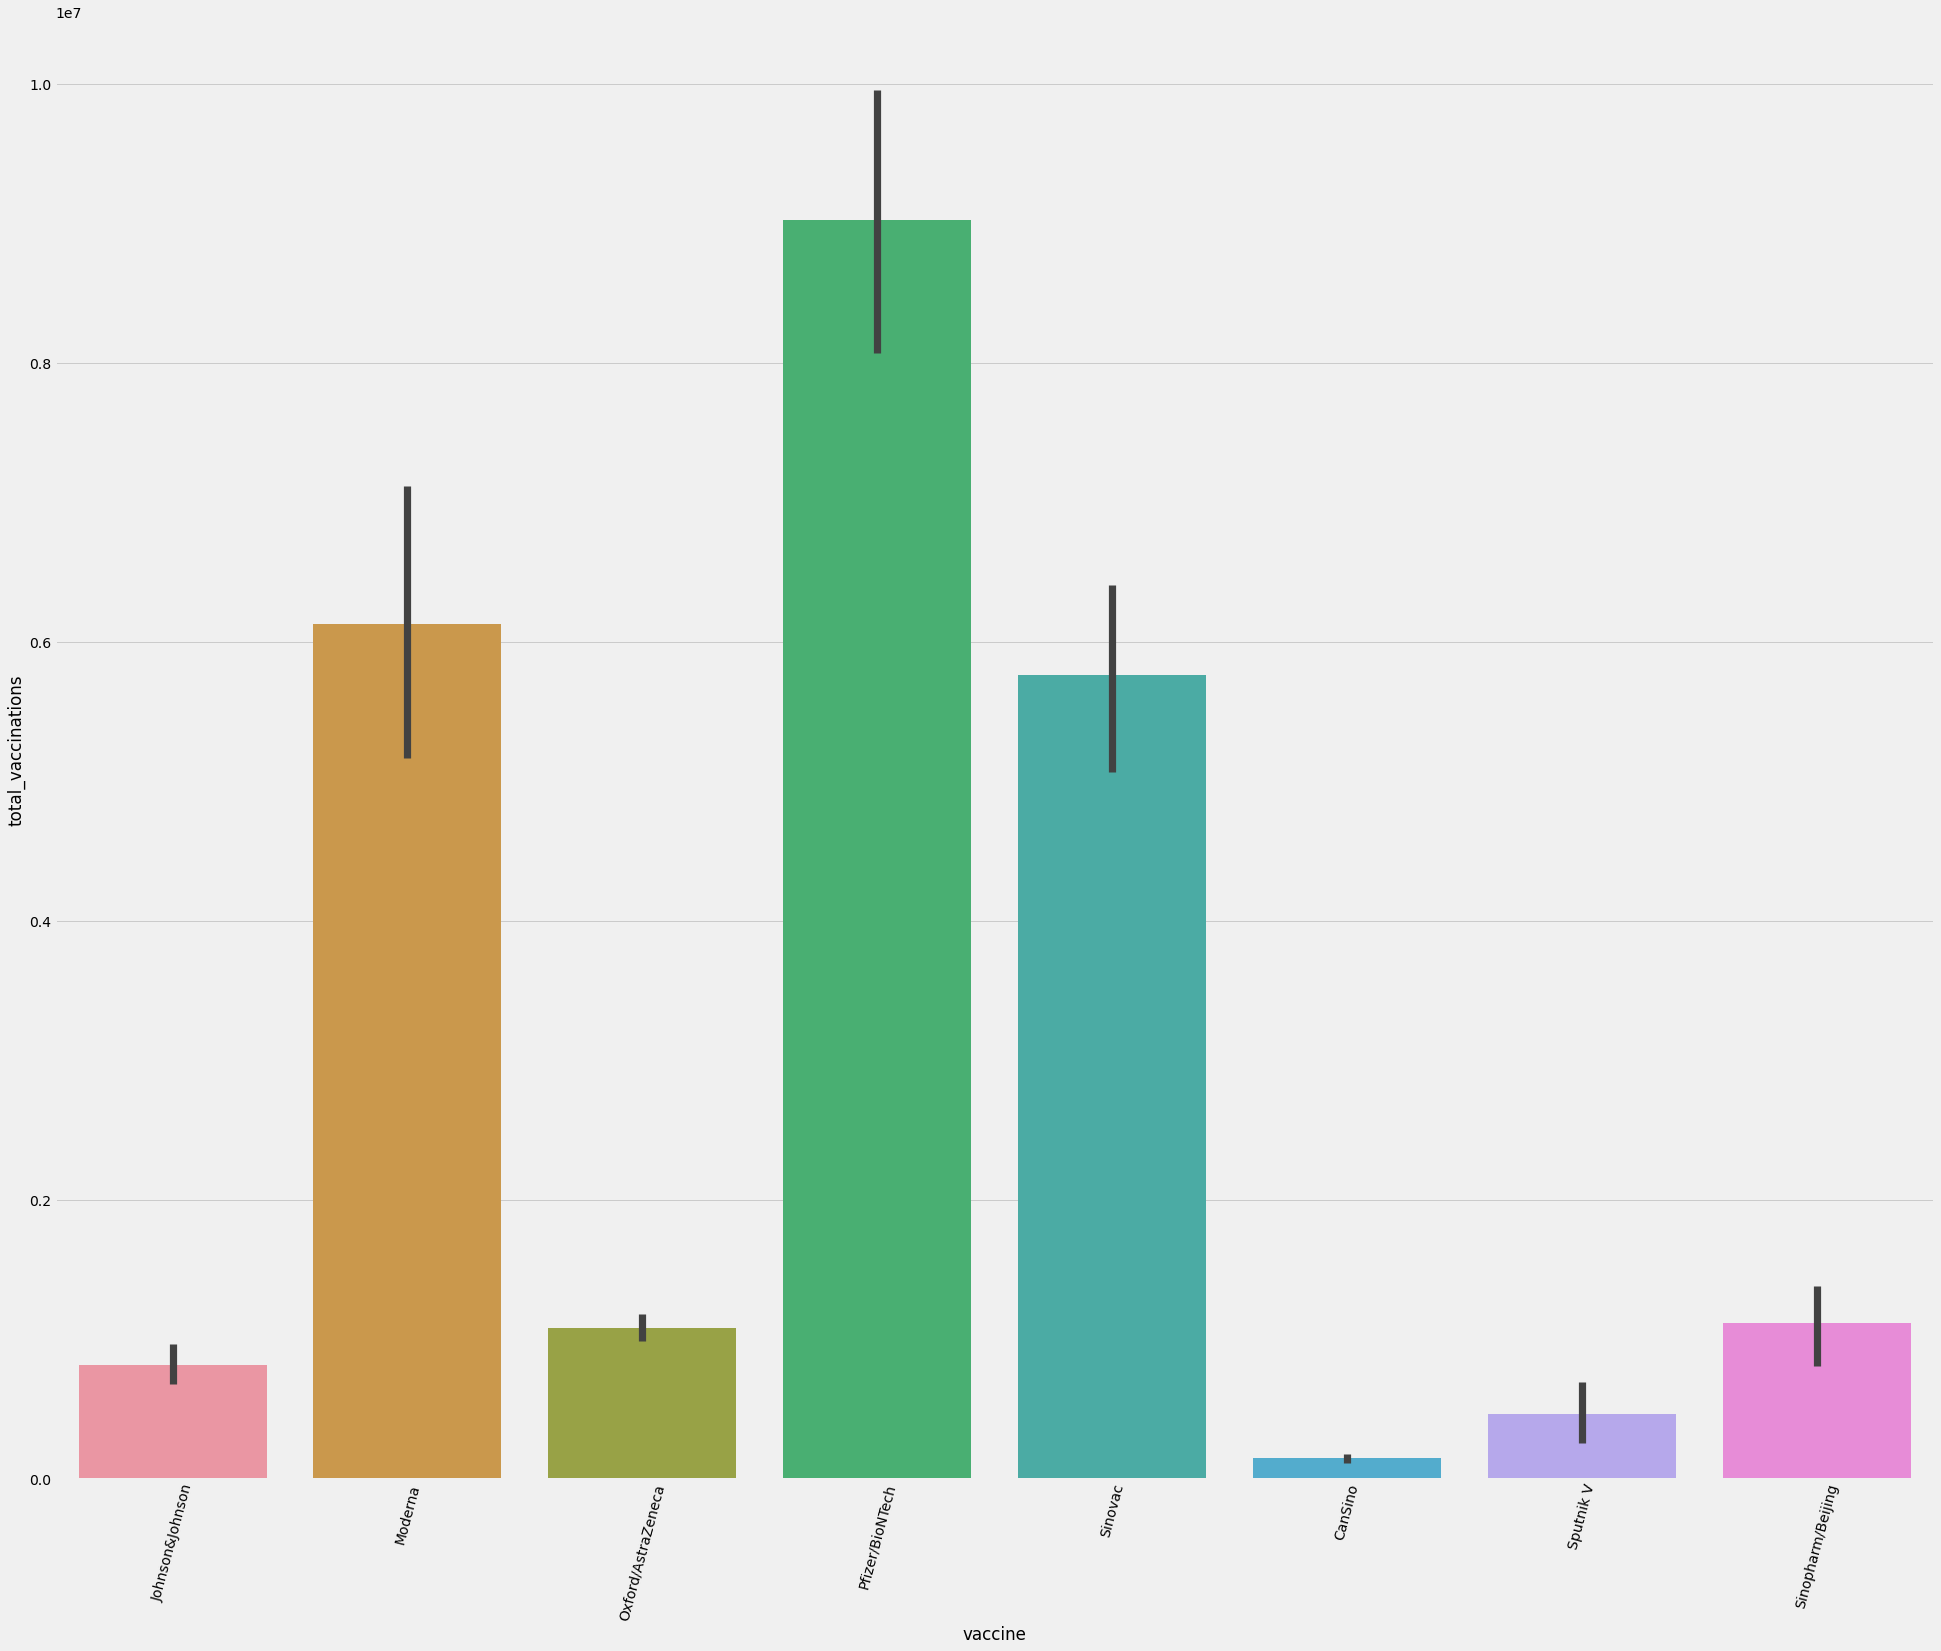

In [ ]:
sns.barplot(x="vaccine", y="total_vaccinations", data=data_vaccinations_m)
plt.xticks(rotation=75);

In [ ]:
vaccinated_country=data_vaccinations.groupby('country')[['total_vaccinations']].max()
most_vaccinated_country=vaccinated_country.sort_values('total_vaccinations', ascending=False).head(10)
most_vaccinated_country

total_vaccinations
country                           
China                 1.029223e+09
United States         3.179664e+08
India                 2.742866e+08
Brazil                8.696057e+07
United Kingdom        7.457768e+07
Germany               6.645462e+07
England               6.263671e+07
France                4.821330e+07
Italy                 4.601671e+07
Turkey                4.261338e+07

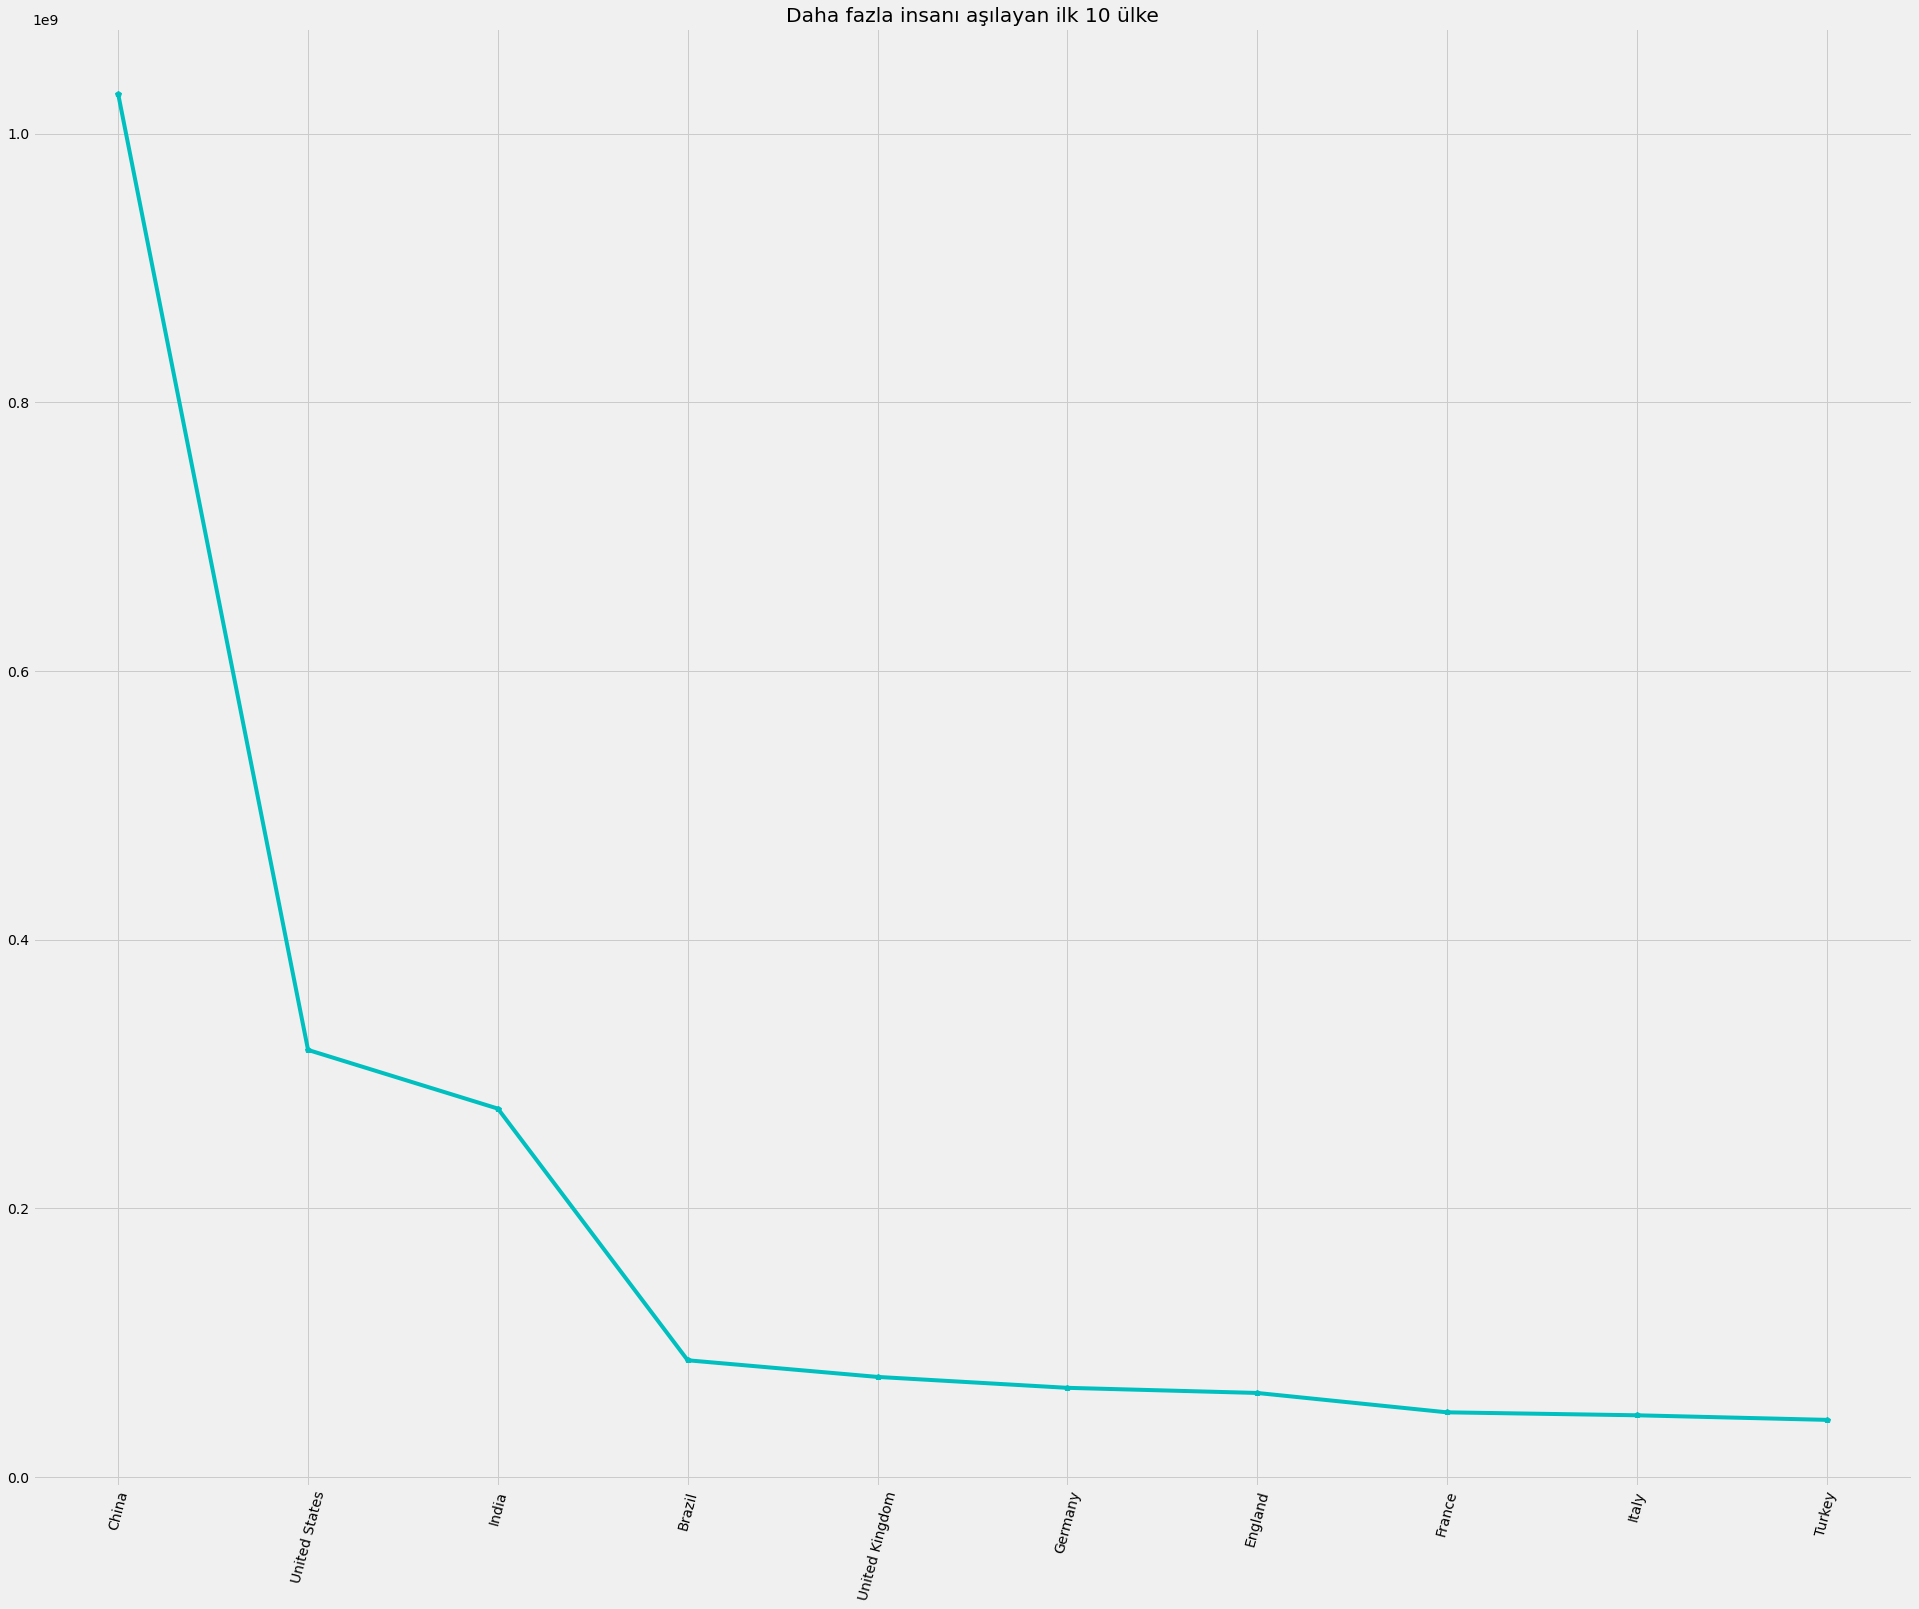

In [ ]:
plt.plot(most_vaccinated_country, 'p-c')
plt.xticks(rotation=75)
plt.title('Daha fazla insanı aşılayan ilk 10 ülke');

In [ ]:
vaccinated_country_ph=data_vaccinations.groupby('country')[['total_vaccinations_per_hundred']].max()
most_vaccinated_country_ph=vaccinated_country_ph.sort_values('total_vaccinations_per_hundred', ascending=False).head(10)
most_vaccinated_country_ph

total_vaccinations_per_hundred
country                                             
Gibraltar                                     231.01
United Arab Emirates                          146.73
Malta                                         142.40
Seychelles                                    140.00
Cayman Islands                                133.17
Saint Helena                                  130.00
San Marino                                    129.84
Falkland Islands                              126.53
Bermuda                                       123.42
Israel                                        122.99

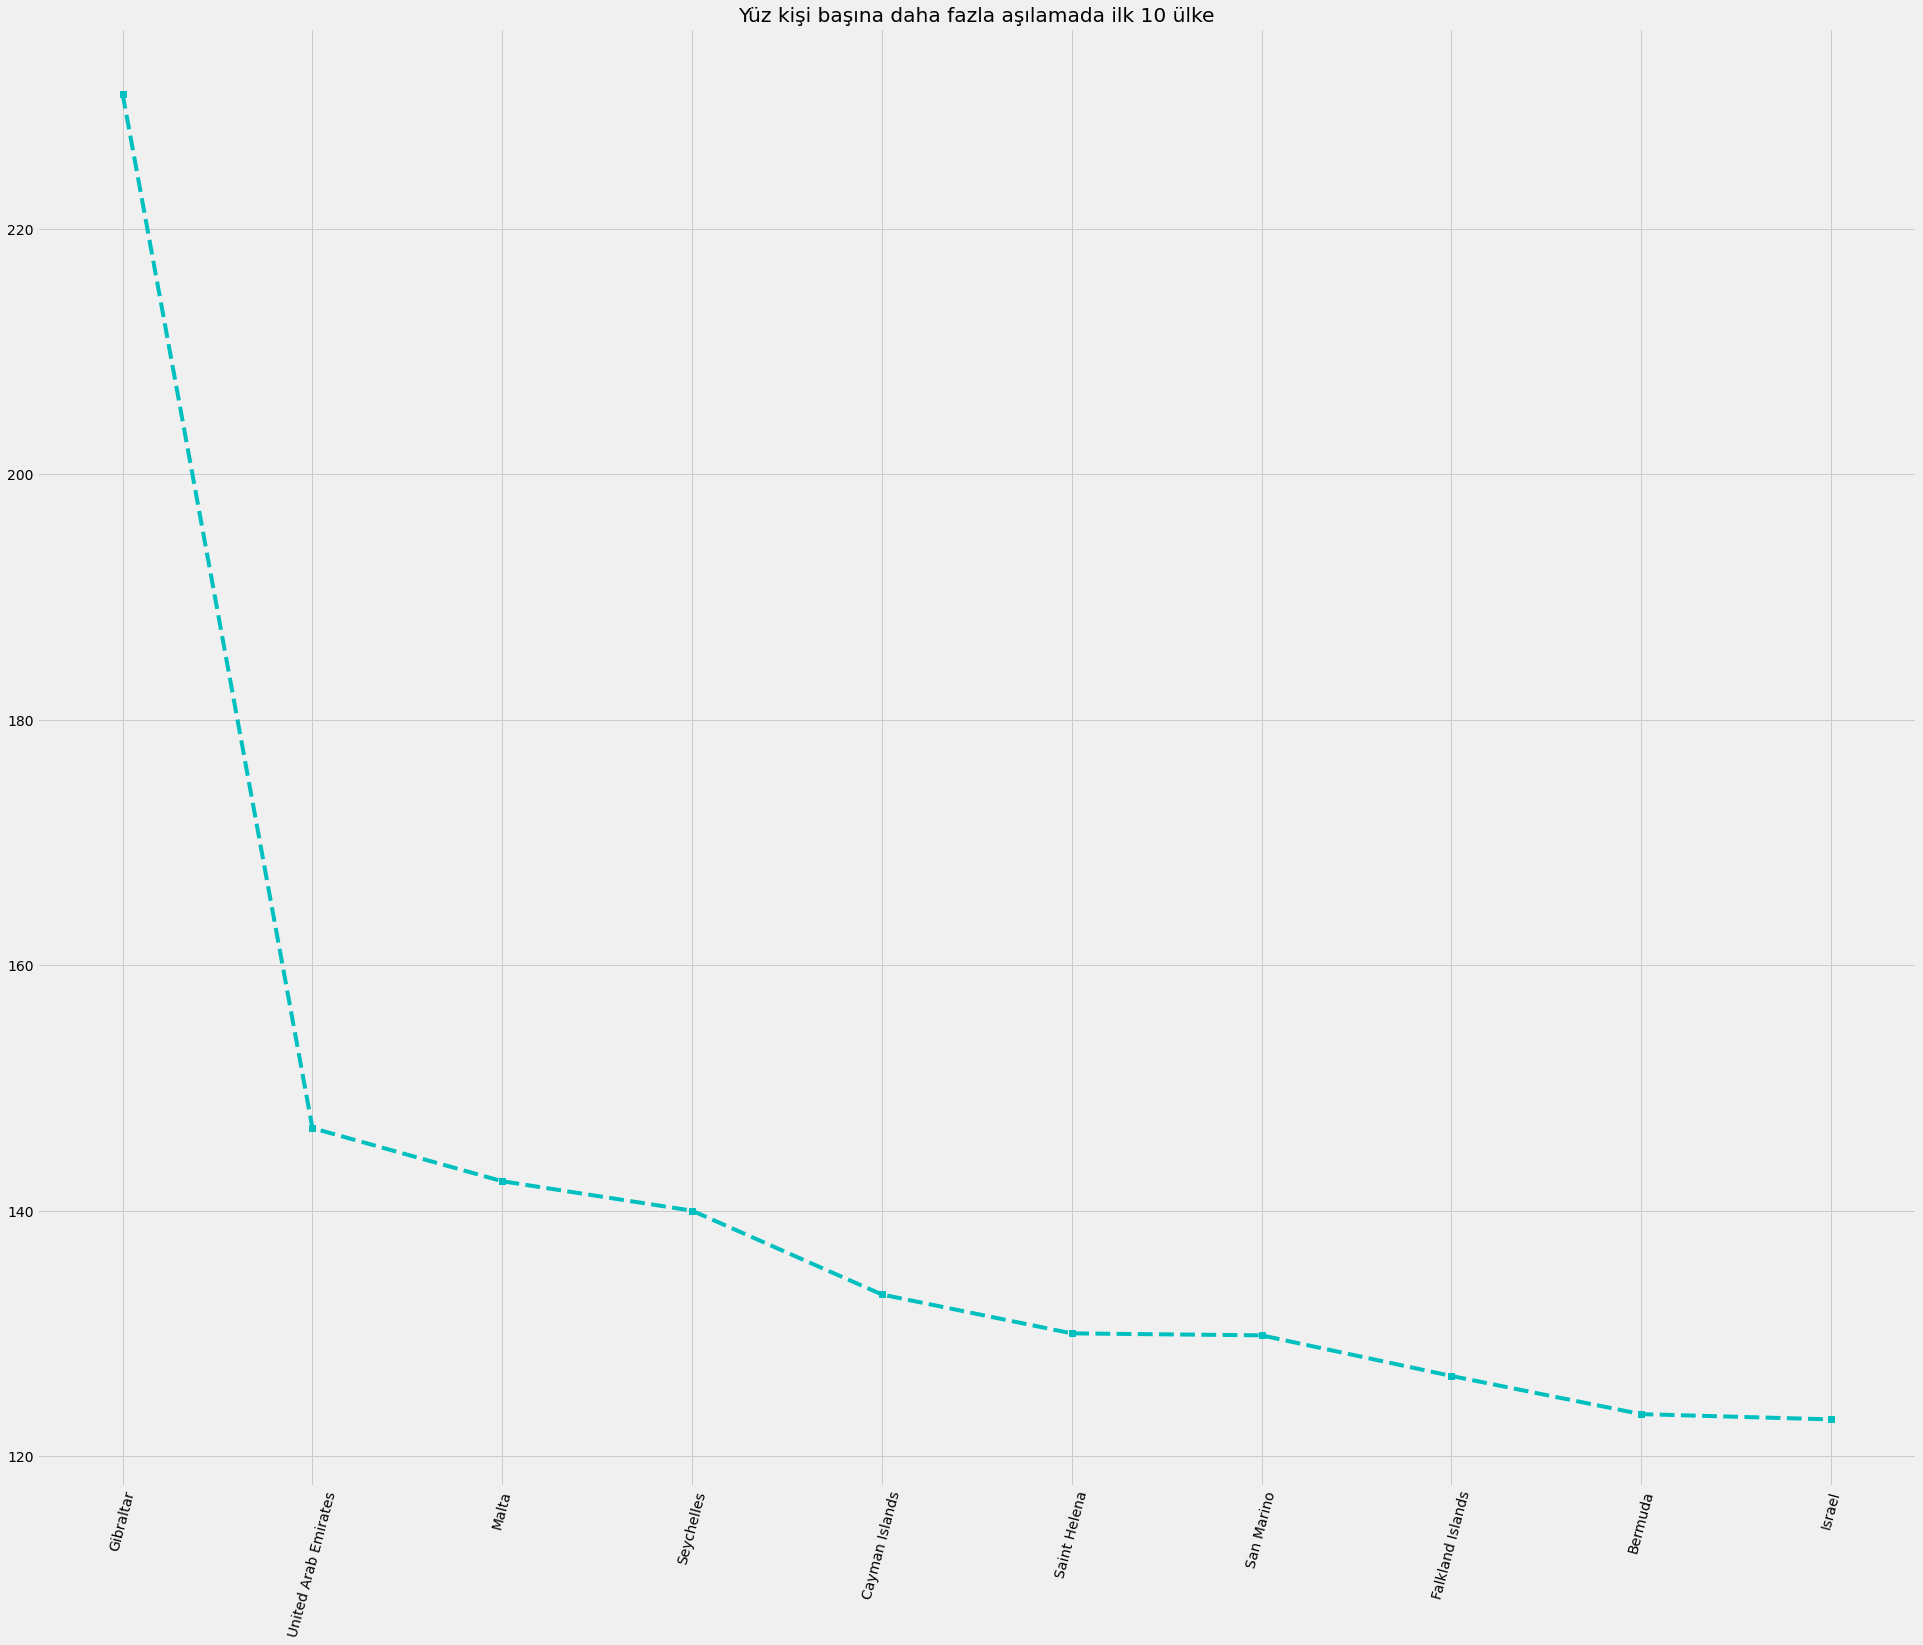

In [ ]:
plt.plot(most_vaccinated_country_ph, 's--c')
plt.xticks(rotation=75)
plt.title('Yüz kişi başına daha fazla aşılamada ilk 10 ülke');

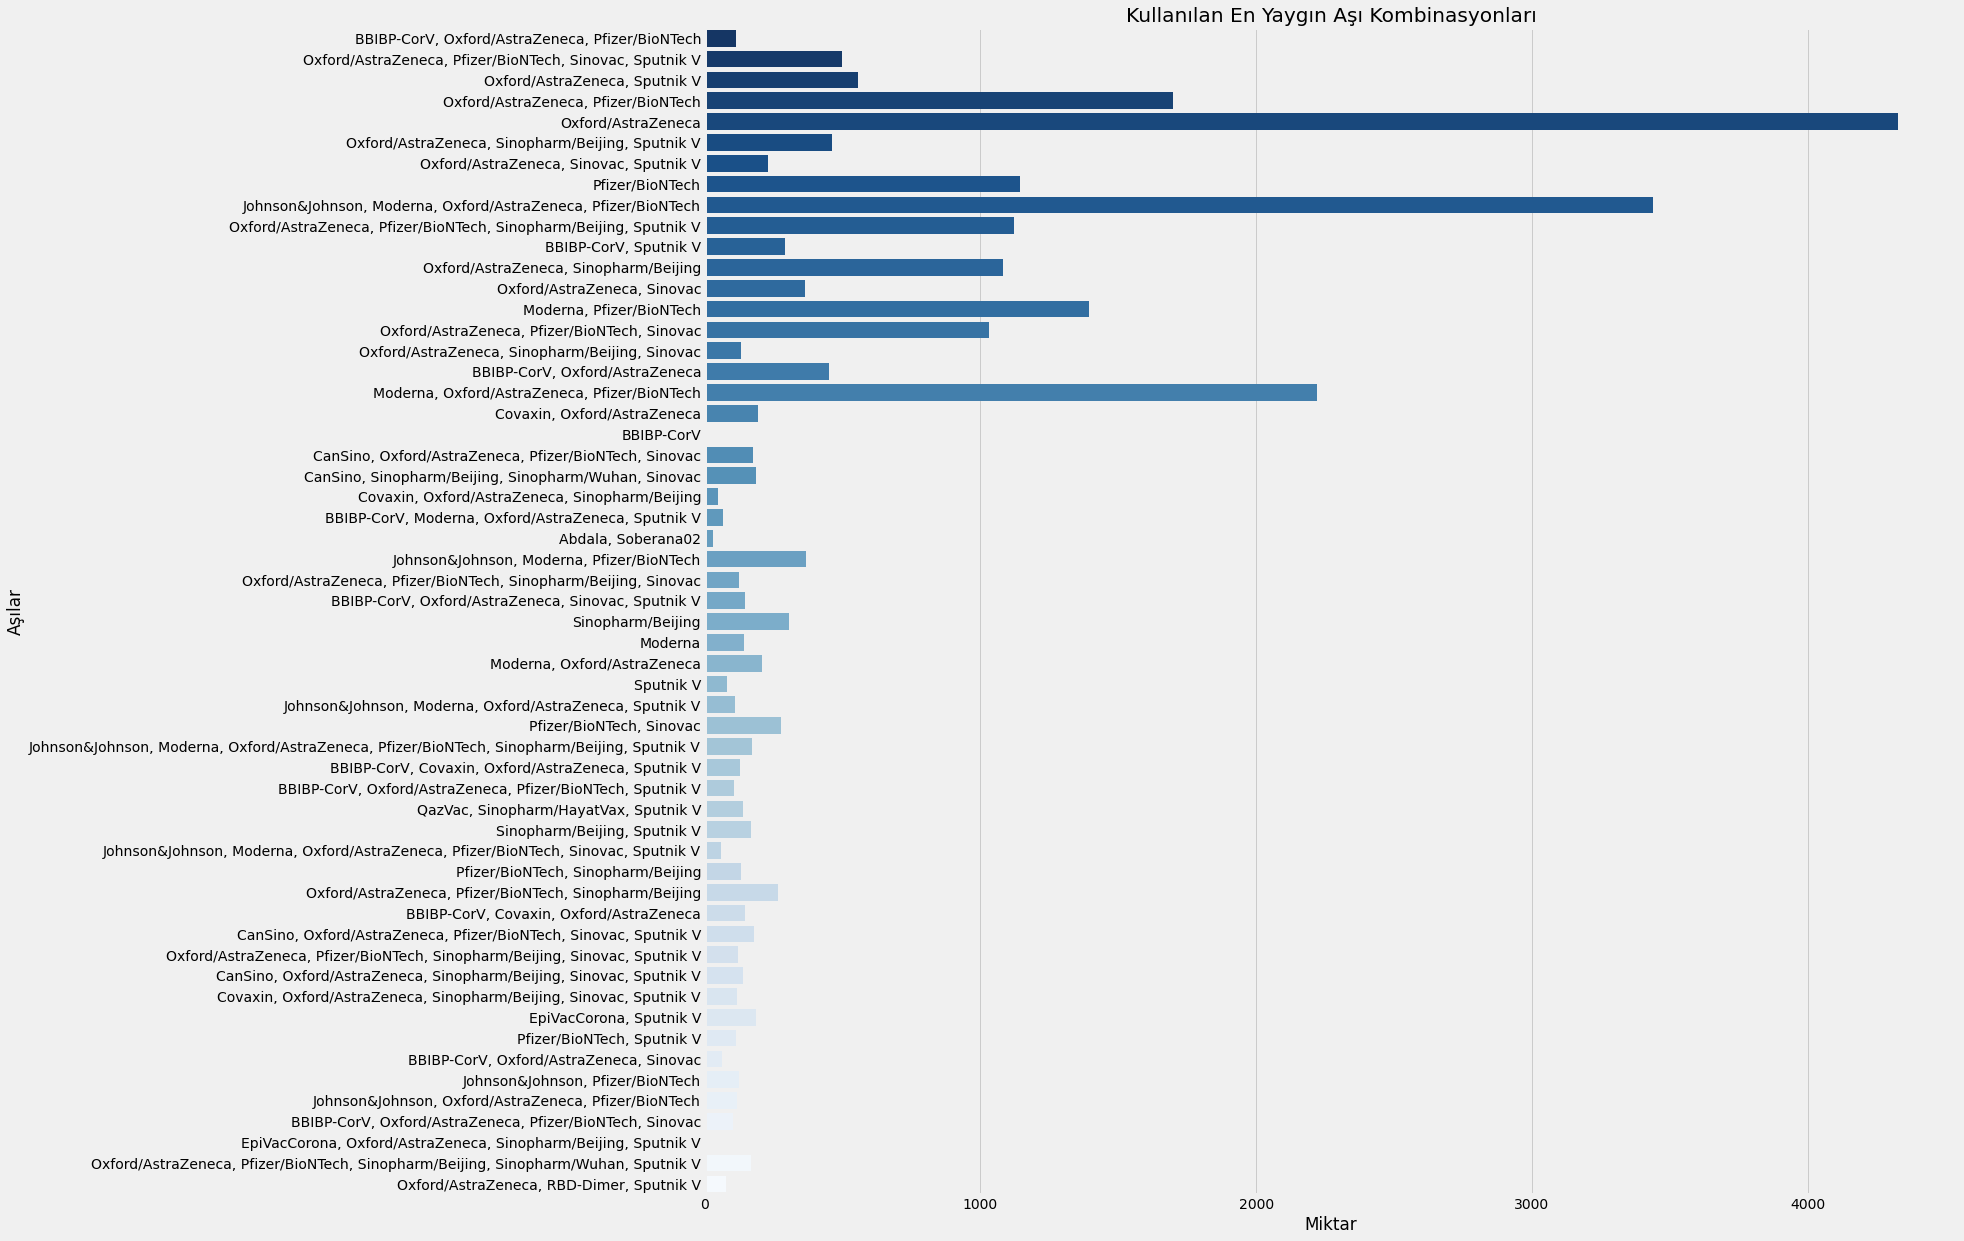

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(y='vaccines', data=data_vaccinations, palette='Blues_r')
plt.ylabel('Aşılar')
plt.xlabel('Miktar')
plt.title('Kullanılan En Yaygın Aşı Kombinasyonları')
plt.show()

In [ ]:
vactr.columns 

Index(['Unnamed: 0', 'Aciklamalar', 'İl', 'Toplam 1. Doz', 'Toplam 2. Doz',
       'Tarih', 'Günlük 1. Doz', 'Günlük 2.Doz'],
      dtype='object')

In [ ]:
vactr.head()

Unnamed: 0  ... Günlük 2.Doz
0         0.0  ...          NaN
1         NaN  ...          NaN
2         1.0  ...          NaN
3         NaN  ...          NaN
4         2.0  ...          NaN

[5 rows x 8 columns]

In [ ]:
vactr['Toplam 1. Doz'].isnull().values.any()

False

<Figure size 1080x576 with 0 Axes>

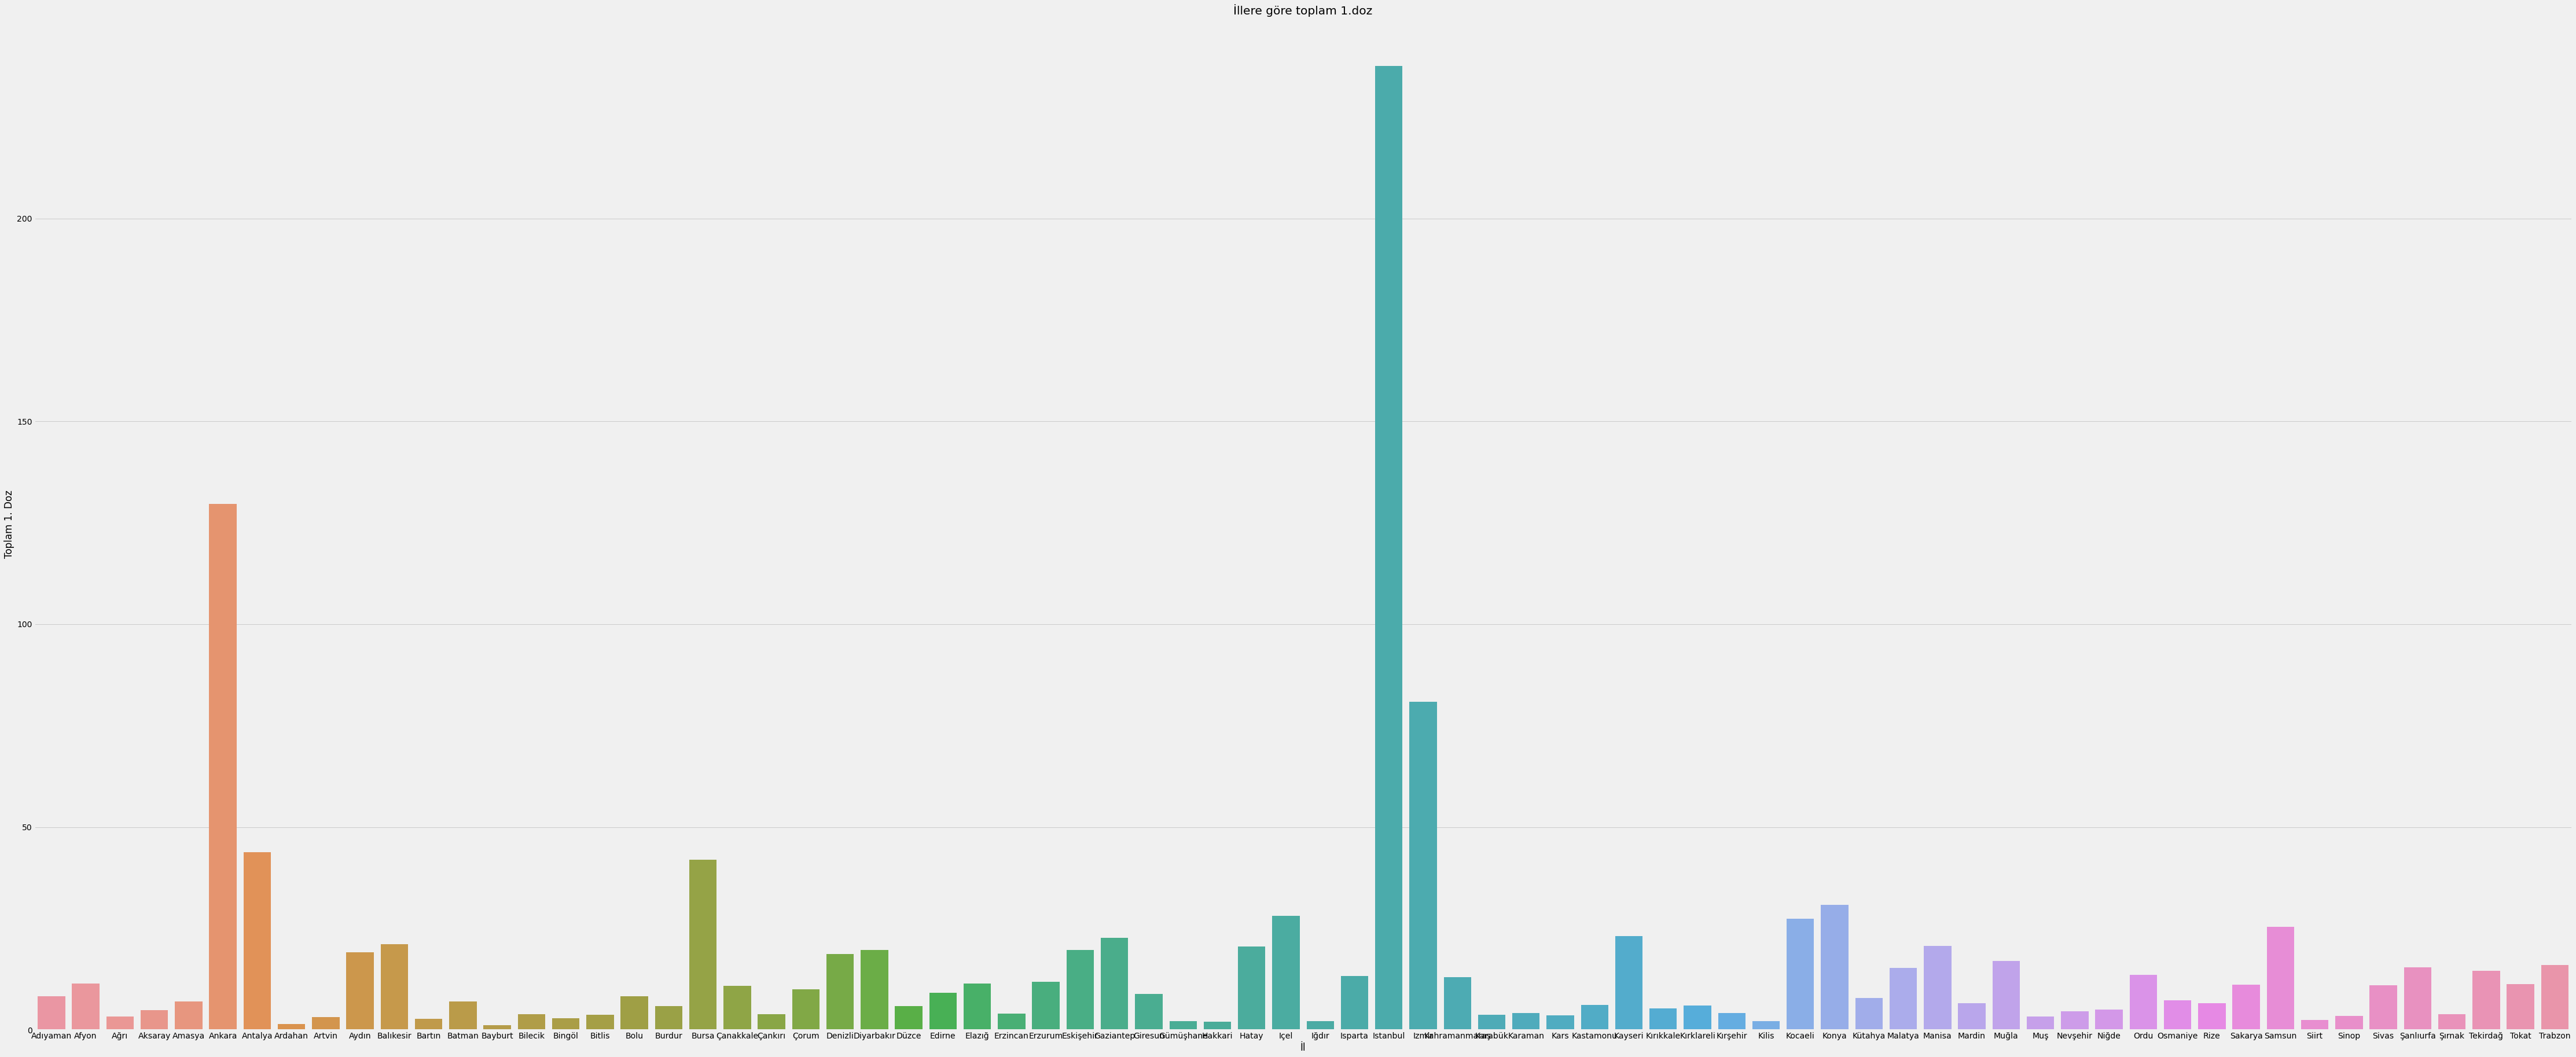

In [ ]:
fig = plt.figure(figsize = (15, 8))

x = vactr["İl"][1:75]
y = vactr['Toplam 1. Doz'][1:75].astype(float)
plt.figure(figsize=(70,30))
sns.barplot(x = x ,y = y, data = vactr)
plt.title("İllere göre toplam 1.doz")
plt.show()

<Figure size 1080x576 with 0 Axes>

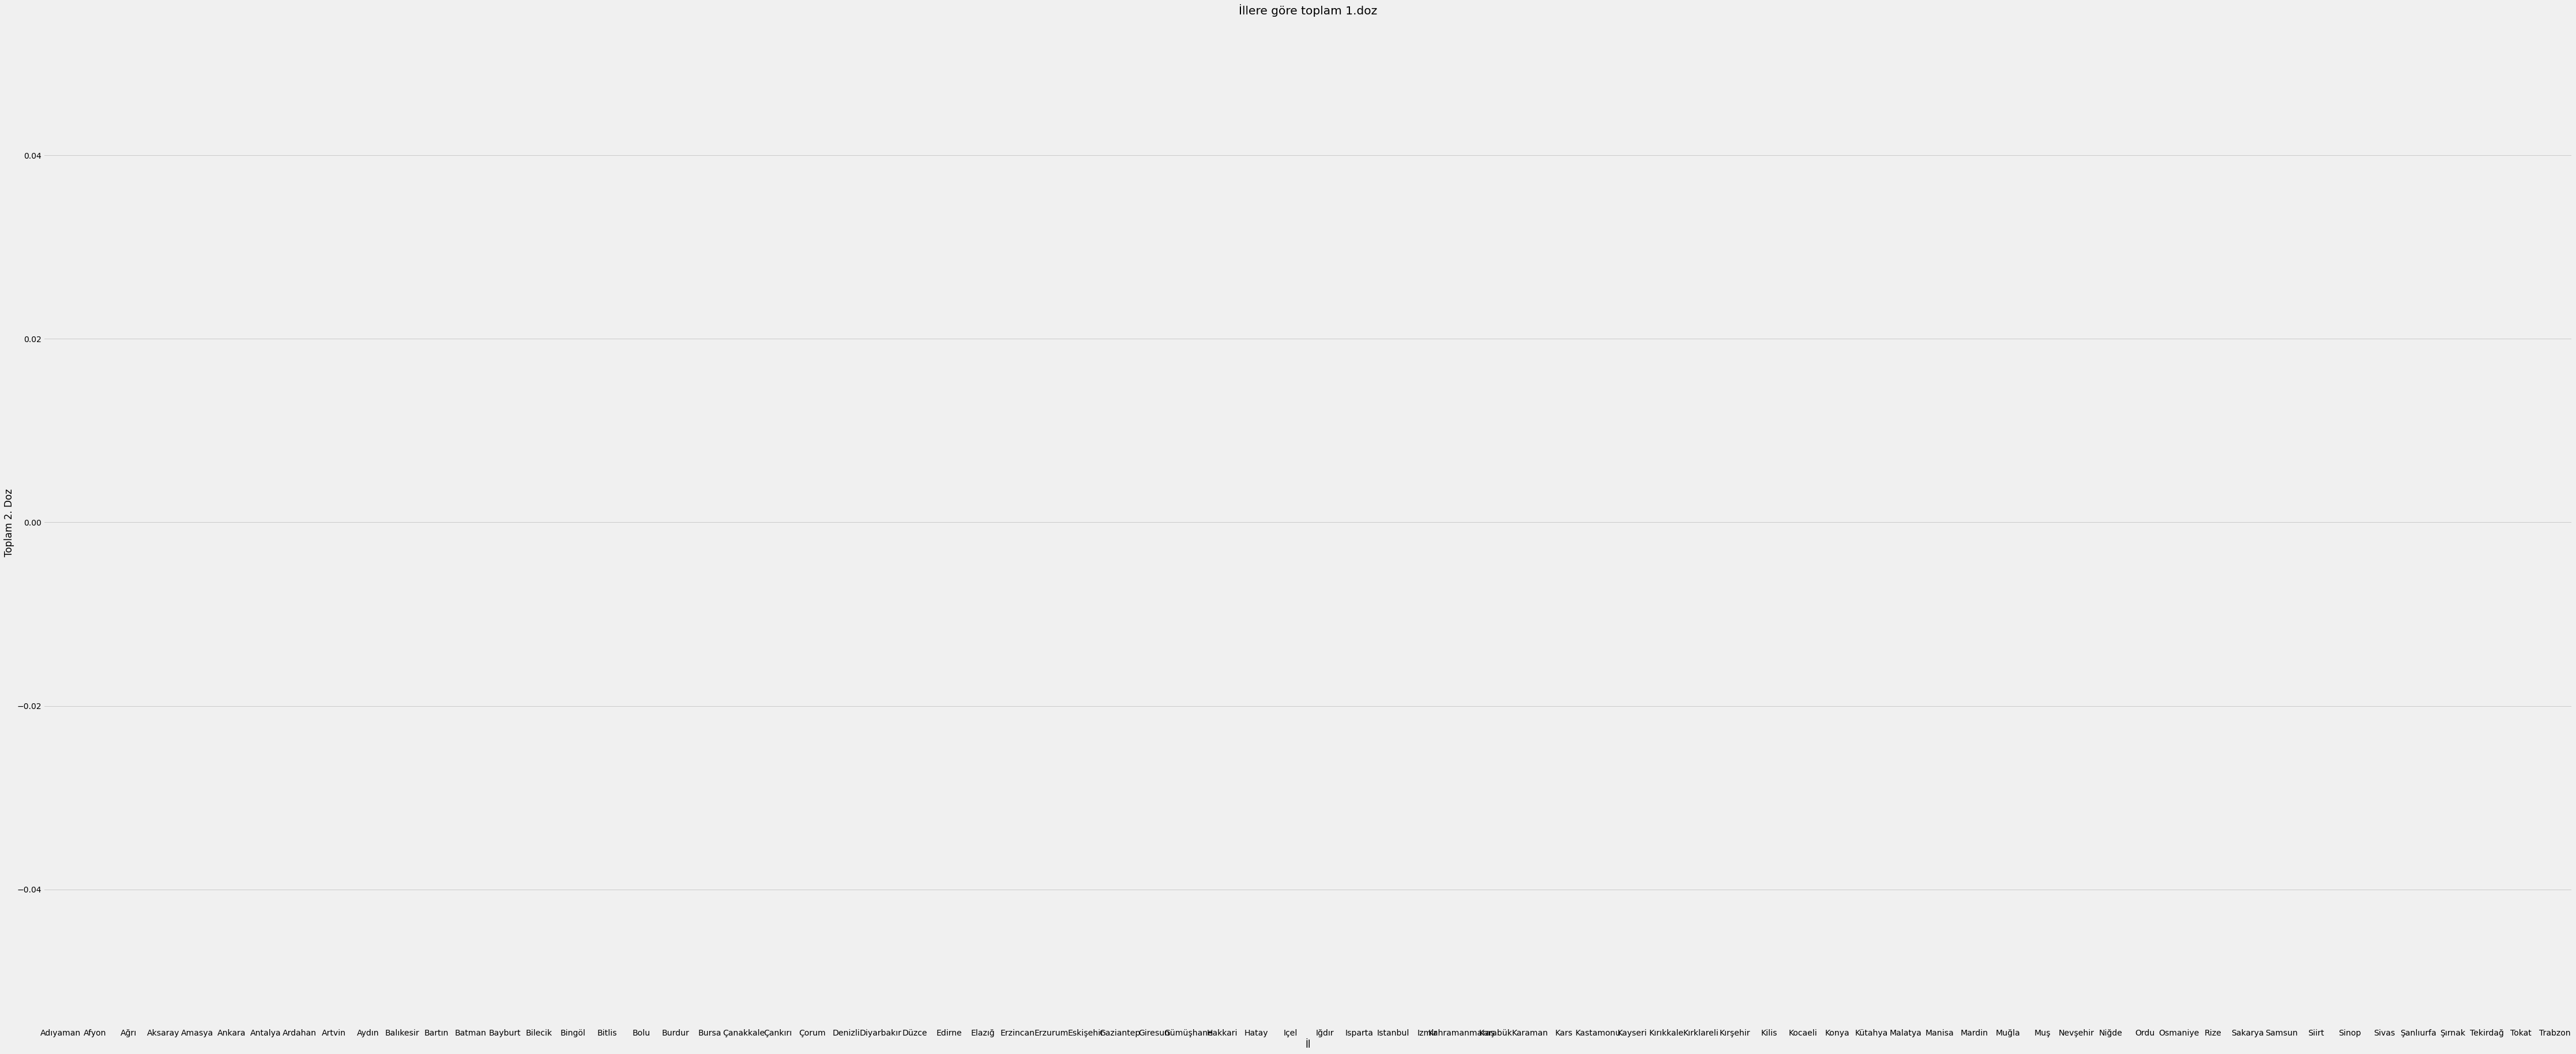

In [ ]:
fig = plt.figure(figsize = (15, 8))

x = vactr["İl"][1:75]
y = vactr['Toplam 2. Doz'][1:75].astype(float)
plt.figure(figsize=(70,30))
sns.barplot(x = x ,y = y, data = vactr)
plt.title("İllere göre toplam 1.doz")
plt.show()